In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
tf.enable_eager_execution()
tf.VERSION

'1.12.0'

## Import data

In [2]:
import pathlib

DATADIR = 'D:/257_data/labeling_data'
data_root = pathlib.Path(DATADIR)

In [3]:
all_image_paths = list(data_root.glob('*/*/*/*/*.jpg'))
all_image_paths = [str(path) for path in all_image_paths]

all_xml_paths = list(data_root.glob('*/*/*/*/*.xml'))
all_xml_paths = [str(path) for path in all_xml_paths]

image_count = len(all_image_paths)
xml_count = len(all_xml_paths)
image_count + xml_count

1924

In [4]:
all_image_paths[:10] + all_xml_paths[:10]

['D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\100n.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\100p.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\101n.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\101p.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\102n.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\102p.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\103n.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\103p.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\104n.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\104p.jpg',
 'D:\\257_data\\labeling_data\\Annotations\\users\\kles90105\\257_data_set\\100n.xml',
 'D:\\257_data\\labeling_data\\Annotations\\users\\kles90105\\257_data_set\\100p.xml',
 'D:\\

In [5]:
import IPython.display as display

def caption_image(image_path):
    image_rel = pathlib.Path(image_path).relative_to(data_root)
    return image_rel
    

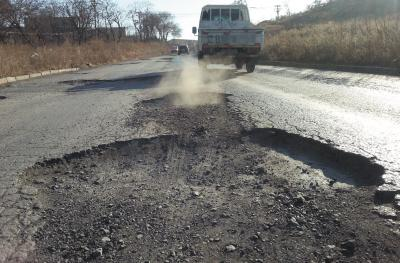

Images\users\kles90105\257_data_set\326p.jpg


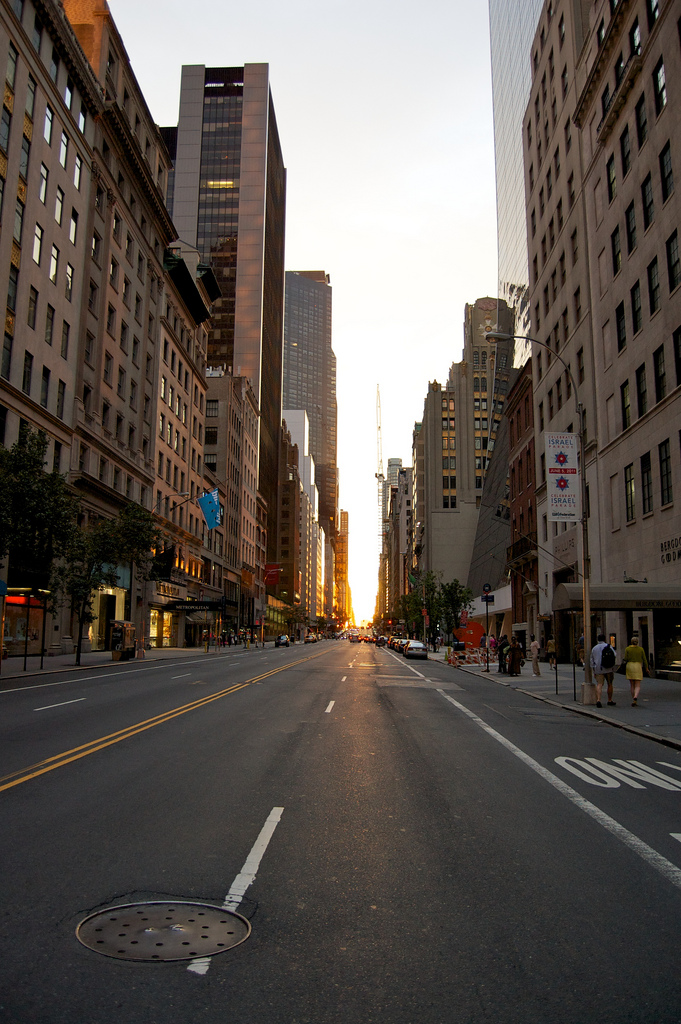

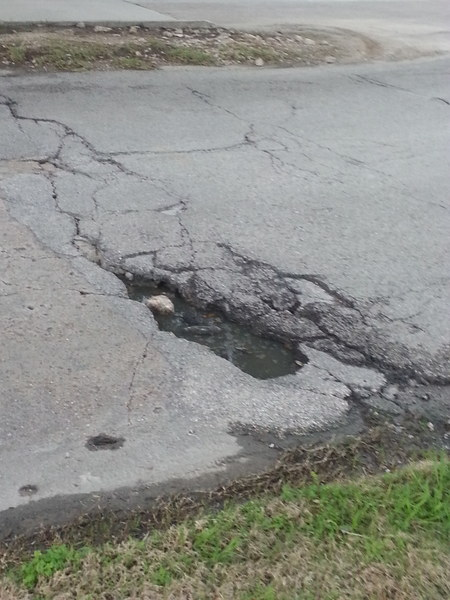

Images\users\kles90105\Negative Images\45.jpg
Images\users\kles90105\Positive Images\141.jpg


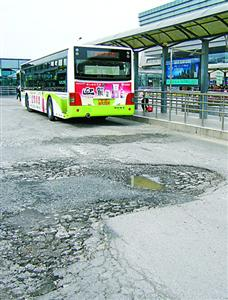

Images\users\kles90105\257_data_set\218p.jpg


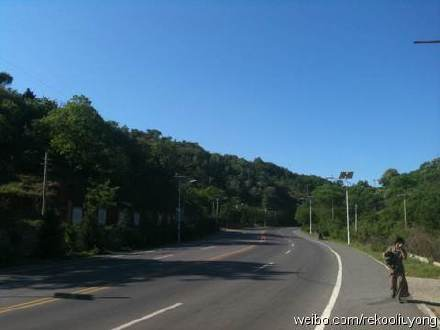

Images\users\kles90105\257_data_set\83n.jpg


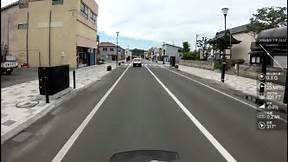

Images\users\kles90105\257_data_set\57n.jpg


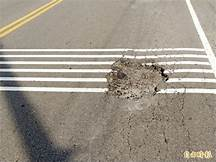

Images\users\kles90105\257_data_set\55p.jpg


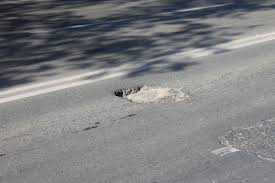

Images\users\kles90105\Positive Images\130.jpg


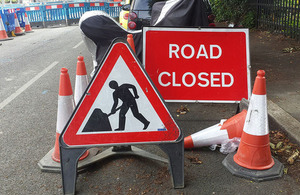

Images\users\kles90105\257_data_set\pwy0153.jpg


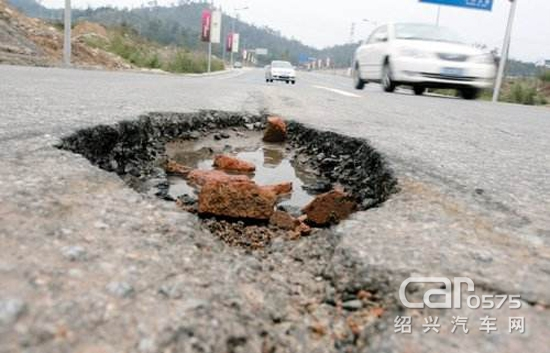

Images\users\kles90105\257_data_set\229p.jpg


In [6]:
import random

for n in range(10):
  image_path = random.choice(all_image_paths)
  display.display(display.Image(image_path))
  print(caption_image(image_path))

In [7]:
import xml.etree.ElementTree as ET
import numpy as np
from array import *
from PIL import Image
import uuid

def xml_tree(x):
    for child in x:
        if(child.getchildren() == []):
            print(child.tag, ":", child.text)
        else:
            print(child.tag)
            xml_tree(child)

for i in range(len(all_image_paths)):
    tree = ET.parse(all_xml_paths[i])
    root = tree.getroot()
    xml_tree(root)
    print("")

    objs = root.findall("./object")

    x_list = []
    y_list = []
    for co in objs:
        print(co.find("./name").text)
        for node in co.findall("./polygon/pt"):
            print("point")
            children = node.getchildren()
            x = children[0].text
            y = children[1].text
            x_list.append(int(float(x)))
            y_list.append(int(float(y)))
            print(int(float(x)), int(float(y)))
        print("top-left", min(x_list), min(y_list))
        print("bottom-right", max(x_list), max(y_list))
        print()
    
        im = Image.open(all_image_paths[i])
        if(str(co.find("./name").text) == 'no pothole'):
            outfile = 'training_objects/pothole0-%s.png' % (str(uuid.uuid4()))
        elif(str(co.find("./name").text) == 'pothole'):
            if(co.find("./attributes").text == None):
                outfile = 'training_objects/pothole3-%s.png' % (str(uuid.uuid4()))
            else:
                outfile = 'training_objects/pothole%s-%s.png' % (str(co.find("./attributes").text), str(uuid.uuid4()))
        else:
            if(str(co.find("./name").text) == 'pothole1' or str(co.find("./name").text) == 'pothole2' 
               or str(co.find("./name").text) == 'pothole3' or str(co.find("./name").text) == 'pothole4'):
                outfile = 'training_objects/%s-%s.png' % (str(co.find("./name").text), str(uuid.uuid4()))
            elif(str(co.find("./name").text) == 'crack'):
                outfile = 'training_objects/pothole1-%s.png' % (str(uuid.uuid4()))
            else:
                outfile = 'training_objects/pothole0-%s.png' % (str(uuid.uuid4()))
        im.crop((min(x_list), min(y_list), max(x_list), max(y_list))).resize((640, 640)).save(outfile)
        print("Save as:", outfile)
        print()
        
        x_list = []
        y_list = []
    

filename : 100n.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 800
ncols : 1200
object
name : paint
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:03:48
id : 0
polygon
username : anonymous
pt
x : 836
y : 508
pt
x : 825
y : 513
pt
x : 1052
y : 621
pt
x : 1089
y : 616
pt
x : 1074
y : 600

paint
point
836 508
point
825 513
point
1052 621
point
1089 616
point
1074 600
top-left 825 508
bottom-right 1089 621

Save as: training_objects/pothole0-c4ac5bae-df5c-43ad-8b47-4cc791f6ba6e.png

filename : 100p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 167
ncols : 250
object
name : pothole4
deleted : 0
verified : 0
occluded : yes
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:01:53
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 25
y : 128
pt
x : 137
y : 128
pt
x : 137
y : 160
p

filename : 106p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 300
ncols : 169
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:35:47
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 69
y : 154
pt
x : 114
y : 154
pt
x : 114
y : 195
pt
x : 69
y : 195

pothole2
point
69 154
point
114 154
point
114 195
point
69 195
top-left 69 154
bottom-right 114 195

Save as: training_objects/pothole2-a0828591-08d1-4d62-989c-79effed58b53.png

filename : 107n.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 683
ncols : 1024
object
name : pattern
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:07:48
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 371
y : 446
pt
x : 606
y : 446
pt
x : 606
y : 679
pt
x : 371
y : 679

p

filename : 111p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 161
ncols : 209
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:04:47
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 88
y : 71
pt
x : 208
y : 71
pt
x : 208
y : 160
pt
x : 88
y : 160
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:04:52
id : 1
type : bounding_box
polygon
username : Bert
pt
x : 28
y : 59
pt
x : 207
y : 59
pt
x : 207
y : 77
pt
x : 28
y : 77

pothole1
point
88 71
point
208 71
point
208 160
point
88 160
top-left 88 71
bottom-right 208 160

Save as: training_objects/pothole1-0cf79778-04fb-442c-aba4-85b465611b7d.png

pothole1
point
28 59
point
207 59
point
207 77
point
28 77
top-left 28 59
bottom-right 207 77

Save as: training_objects/pothole1-b0360241-c445-4d56-8f76-6a73

Save as: training_objects/pothole3-341f2e76-0d63-4c72-99f6-7bb0e1f9ec88.png

pothole3
point
87 33
point
120 33
point
120 23
point
87 23
top-left 87 23
bottom-right 120 33

Save as: training_objects/pothole3-3e88ba0b-1e33-43f8-ac5d-b161765f61ef.png

pothole3
point
126 16
point
158 16
point
158 30
point
126 30
top-left 126 16
bottom-right 158 30

Save as: training_objects/pothole3-18c8f90b-cb1c-48dc-81f1-29c5a19c9a63.png

pothole3
point
118 46
point
151 46
point
151 66
point
118 66
top-left 118 46
bottom-right 151 66

Save as: training_objects/pothole3-0f14a0a9-ad67-4167-8e9e-ae89c427b633.png

pothole3
point
25 32
point
94 32
point
94 76
point
25 76
top-left 25 32
bottom-right 94 76

Save as: training_objects/pothole3-029df774-1d1d-41ba-bb7b-f8a9a3e283d0.png

pothole3
point
13 110
point
44 110
point
44 130
point
13 130
top-left 13 110
bottom-right 44 130

Save as: training_objects/pothole3-d8506550-e276-4297-a2c2-1d4b5b6f1c97.png

pothole3
point
3 135
point
46 135
point
46 157
point
3 15

Save as: training_objects/pothole1-cb07ebc2-1001-4cda-a43b-a2b08ed73b01.png

pothole2
point
66 99
point
80 99
point
80 104
point
66 104
top-left 66 99
bottom-right 80 104

Save as: training_objects/pothole2-6e693e4c-11f9-42b5-a83f-d01e0256aa0a.png

filename : 122p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 154
ncols : 273
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:06:01
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 58
y : 89
pt
x : 245
y : 89
pt
x : 245
y : 136
pt
x : 58
y : 136

pothole4
point
58 89
point
245 89
point
245 136
point
58 136
top-left 58 89
bottom-right 245 136

Save as: training_objects/pothole4-755abdc8-9cda-45b2-b6a6-9dcb1178f551.png

filename : 123p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 300
ncols : 200
object
name : pothole2
deleted : 0
verified : 

filename : 130p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 161
ncols : 256
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:48:37
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 31
y : 101
pt
x : 85
y : 101
pt
x : 85
y : 137
pt
x : 31
y : 137

pothole4
point
31 101
point
85 101
point
85 137
point
31 137
top-left 31 101
bottom-right 85 137

Save as: training_objects/pothole4-9e11e15c-009b-4a6e-ab87-2abddefb78fe.png

filename : 131p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 300
ncols : 197
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:08:01
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 141
y : 283
pt
x : 28
y : 283
pt
x : 28
y : 238
pt
x : 141
y : 238

pothole4
point
141 283


y : 42
pt
x : 227
y : 111
pt
x : 96
y : 111
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:56:19
id : 1
type : bounding_box
polygon
username : Bert
pt
x : 35
y : 65
pt
x : 134
y : 65
pt
x : 134
y : 125
pt
x : 35
y : 125
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:56:24
id : 2
type : bounding_box
polygon
username : Bert
pt
x : 205
y : 118
pt
x : 296
y : 118
pt
x : 296
y : 164
pt
x : 205
y : 164

pothole3
point
96 42
point
227 42
point
227 111
point
96 111
top-left 96 42
bottom-right 227 111

Save as: training_objects/pothole3-b122dd37-3041-4869-9f01-e0cf57d5cc8c.png

pothole1
point
35 65
point
134 65
point
134 125
point
35 125
top-left 35 65
bottom-right 134 125

Save as: training_objects/pothole1-263dd286-5eae-4321-854e-400baeaf2f09.png

pothole2
point
205 118
point
296 118
point
296 164
point
205 16

Save as: training_objects/pothole2-86cc7bd1-e44c-4d8e-a98c-6dee0d462630.png

pothole3
point
134 222
point
225 222
point
225 280
point
134 280
top-left 134 222
bottom-right 225 280

Save as: training_objects/pothole3-1d4c2e72-96c8-43cd-9f24-fe8aa0c02066.png

pothole2
point
545 143
point
695 143
point
695 253
point
545 253
top-left 545 143
bottom-right 695 253

Save as: training_objects/pothole2-e6d5b208-7c76-4293-8fcf-555452578a7b.png

filename : 146p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 202
ncols : 250
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:11:44
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 98
y : 96
pt
x : 217
y : 96
pt
x : 217
y : 111
pt
x : 98
y : 111
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:11:54
id : 1
type : bo

deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:14:17
id : 1
type : bounding_box
polygon
username : Bert
pt
x : 113
y : 74
pt
x : 159
y : 74
pt
x : 159
y : 93
pt
x : 113
y : 93
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:14:23
id : 2
type : bounding_box
polygon
username : Bert
pt
x : 174
y : 71
pt
x : 136
y : 71
pt
x : 136
y : 61
pt
x : 174
y : 61
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:14:27
id : 3
type : bounding_box
polygon
username : Bert
pt
x : 108
y : 73
pt
x : 83
y : 73
pt
x : 83
y : 66
pt
x : 108
y : 66
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:14:30
id : 4
type : bounding_box
polygon
username : Bert
pt
x : 86
y : 60
pt
x

Save as: training_objects/pothole1-d0fcb454-dcac-4ba0-a908-d8e2f38b4d1a.png

filename : 160p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 163
ncols : 205
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:58:34
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 17
y : 30.999999999999986
pt
x : 187
y : 30.999999999999986
pt
x : 187
y : 139
pt
x : 17
y : 139

pothole3
point
17 30
point
187 30
point
187 139
point
17 139
top-left 17 30
bottom-right 187 139

Save as: training_objects/pothole3-7cba8447-6dcf-4647-9f41-4f4669379f73.png

filename : 161p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 300
ncols : 227
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:18:02
id : 0
type : bounding_box
polygon
usern

Save as: training_objects/pothole3-b596c626-18f9-4f1d-8d2f-e3eced215d65.png

pothole1
point
9 35
point
179 35
point
179 152
point
9 152
top-left 9 35
bottom-right 179 152

Save as: training_objects/pothole1-4c3844ee-d6cc-49b6-89d8-50fd543a1bf5.png

filename : 16n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 164
ncols : 261
object
name : pothole0
deleted : 0
verified : 0
occluded : yes
attributes : steel plate
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:04:07
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 9
y : 90
pt
x : 249
y : 90
pt
x : 249
y : 164
pt
x : 9
y : 164

pothole0
point
9 90
point
249 90
point
249 164
point
9 164
top-left 9 90
bottom-right 249 164

Save as: training_objects/pothole0-b224137e-416e-4a6c-ae9c-e58f07b6aa4b.png

filename : 16p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 165
ncols : 268
object
name : pothole3
deleted : 0
verified :

top-left 11 17
bottom-right 62 28

Save as: training_objects/pothole3-c553bf22-f565-4704-aa56-f77fb70585e3.png

filename : 175p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 165
ncols : 219
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:21:31
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 80
y : 73
pt
x : 126
y : 73
pt
x : 126
y : 120
pt
x : 80
y : 120
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:21:35
id : 1
type : bounding_box
polygon
username : Bert
pt
x : 97
y : 50
pt
x : 112
y : 50
pt
x : 112
y : 57
pt
x : 97
y : 57

pothole3
point
80 73
point
126 73
point
126 120
point
80 120
top-left 80 73
bottom-right 126 120

Save as: training_objects/pothole3-9de9072d-e2c7-46c0-bcea-0310076720b8.png

pothole3
point
97 50
point
112 50
point
112 57

Save as: training_objects/pothole3-fbcf9091-93ec-4da3-a9a8-3b815ed7bd18.png

pothole
point
75 240
point
311 240
point
311 338
point
75 338
top-left 75 240
bottom-right 311 338

Save as: training_objects/pothole3-d287503e-6f80-4b26-99e8-6d9de30d6c78.png

pothole
point
229 209
point
307 209
point
307 234
point
229 234
top-left 229 209
bottom-right 307 234

Save as: training_objects/pothole3-4233b904-1fa9-444d-a25c-4fd8e115d3e5.png

pothole
point
323 206
point
413 206
point
413 228
point
323 228
top-left 323 206
bottom-right 413 228

Save as: training_objects/pothole3-5614414d-3594-431e-9b4e-8e7b22cdfd22.png

pothole
point
344 247
point
414 247
point
414 272
point
344 272
top-left 344 247
bottom-right 414 272

Save as: training_objects/pothole2-436574c5-961d-440f-ba4e-4269567f0c77.png

pothole
point
41 226
point
111 226
point
111 238
point
41 238
top-left 41 226
bottom-right 111 238

Save as: training_objects/pothole2-bba04941-f2c8-4877-9c0c-298c7db61f4f.png

filename : 181p.jpg
folder : 

Save as: training_objects/pothole2-930b14e6-3975-410b-bd96-0fe8cf027bcf.png

pothole
point
13 329
point
39 369
point
256 260
point
242 246
top-left 13 246
bottom-right 256 369

Save as: training_objects/pothole1-10156575-1e79-41dd-86fc-65344dd492f5.png

pothole
point
314 290
point
104 412
point
62 411
point
271 283
top-left 62 283
bottom-right 314 412

Save as: training_objects/pothole1-975828cb-2ffe-4fac-ad1f-23668205e6ff.png

filename : 187p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 413
ncols : 550
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 06:57:59
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 524
y : 126
pt
x : 1
y : 126
pt
x : 1
y : 347
pt
x : 524
y : 347

pothole
point
524 126
point
1 126
point
1 347
point
524 347
top-left 1 126
bottom-right 524 347

Save as: training_objects/pothole3-db4b1dbb-051a-4cc7-88e6-

Save as: training_objects/pothole2-817df611-7a2e-461f-adf0-a6b31f26b17e.png

filename : 196p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 218
ncols : 300
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:00:50
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 37
y : 55
pt
x : 298
y : 55
pt
x : 298
y : 215
pt
x : 37
y : 215

pothole
point
37 55
point
298 55
point
298 215
point
37 215
top-left 37 55
bottom-right 298 215

Save as: training_objects/pothole1-c5e00f30-2912-4b14-87ea-dd2df4a6daf2.png

filename : 197p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 318
ncols : 400
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:01:06
id : 0
polygon
username : Shiyan Cai
pt
x : 219
y : 49


239 195
point
124 195
top-left 124 146
bottom-right 239 195

Save as: training_objects/pothole3-162420d8-ba91-4c06-8299-f9a15d60f334.png

pothole
point
241 121
point
288 121
point
288 135
point
241 135
top-left 241 121
bottom-right 288 135

Save as: training_objects/pothole2-b954c5bd-9367-4235-8591-cc33c96c2b34.png

filename : 201p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 866
ncols : 1300
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:06:32
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 229
y : 490
pt
x : 865
y : 490
pt
x : 865
y : 707
pt
x : 229
y : 707

pothole
point
229 490
point
865 490
point
865 707
point
229 707
top-left 229 490
bottom-right 865 707

Save as: training_objects/pothole3-c3bc2aa2-8aee-405c-a31a-9a803d45fa38.png

filename : 202p.jpg
folder : users/robert4213//pothole_data/training_data
source
subm

Save as: training_objects/pothole3-02249b27-8a22-457b-8828-9acd81fe6e74.png

pothole
point
360 114
point
506 114
point
506 155
point
360 155
top-left 360 114
bottom-right 506 155

Save as: training_objects/pothole3-cfb04263-8fdd-403c-bcf3-4022e35c5a67.png

pothole
point
514 149
point
546 149
point
546 179
point
514 179
top-left 514 149
bottom-right 546 179

Save as: training_objects/pothole3-42d7ef42-6e4d-4a78-85e6-34ccb06cc405.png

filename : 20n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 161
ncols : 214
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:05:01
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 121
y : 107
pt
x : 154
y : 107
pt
x : 154
y : 144
pt
x : 121
y : 144

pothole0
point
121 107
point
154 107
point
154 144
point
121 144
top-left 121 107
bottom-right 154 144

Save as: training_objects/pothole0-8e9eab07-9b4c-44ef-a7

point
113 296
point
0 296
top-left 0 166
bottom-right 113 296

Save as: training_objects/pothole1-5b7be082-f4d5-4a1f-9d65-2572d4a5253a.png

filename : 219p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 246
ncols : 310
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:12:20
id : 0
polygon
username : Shiyan Cai
pt
x : 9
y : 174
pt
x : 113
y : 125
pt
x : 172
y : 134
pt
x : 183
y : 145
pt
x : 135
y : 174
pt
x : 74
y : 182
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:12:32
id : 1
polygon
username : Shiyan Cai
pt
x : 167
y : 103
pt
x : 148
y : 121
pt
x : 163
y : 129
pt
x : 200
y : 123
pt
x : 218
y : 114
pt
x : 215
y : 107
pt
x : 201
y : 104
pt
x : 183
y : 104

pothole
point
9 174
point
113 125
point
172 134
point
183 145
point
135 174
point
74 182
top-left 

bottom-right 375 242

Save as: training_objects/pothole4-31e1221b-9df3-4eff-996e-f0c493cad0b5.png

filename : 224p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 300
ncols : 400
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 4
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:15:55
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 345
y : 66
pt
x : 6
y : 66
pt
x : 6
y : 220
pt
x : 345
y : 220

pothole
point
345 66
point
6 66
point
6 220
point
345 220
top-left 6 66
bottom-right 345 220

Save as: training_objects/pothole4-e1b6ad00-56dd-463b-9521-8b743724532c.png

filename : 225p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 205
ncols : 310
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:16:12
id : 0
type : bounding_box
polygon
use

bottom-right 446 142

Save as: training_objects/pothole3-6cc88c9e-f699-42f4-ae47-9a2a2e1048aa.png

pothole
point
453 153
point
598 153
point
598 255
point
453 255
top-left 453 153
bottom-right 598 255

Save as: training_objects/pothole3-8896c148-2e81-4fcd-b62a-4c584a5b0649.png

filename : 232p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 400
ncols : 533
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:18:57
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 48
y : 319
pt
x : 234
y : 319
pt
x : 234
y : 374
pt
x : 48
y : 374
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:19:01
id : 1
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 143
y : 259
pt
x : 215
y : 259
pt
x : 215
y : 297
pt
x : 143
y : 297
object
name : pothole
deleted : 0

Save as: training_objects/pothole1-51fefa70-0600-4fac-9f09-12b702c9141b.png

filename : 239p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 242
ncols : 400
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:21:05
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 32
y : 109
pt
x : 340
y : 109
pt
x : 340
y : 172
pt
x : 32
y : 172

pothole
point
32 109
point
340 109
point
340 172
point
32 172
top-left 32 109
bottom-right 340 172

Save as: training_objects/pothole3-ccc4c6b5-747c-41e2-ae7c-ae9503cb12b4.png

filename : 23n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 175
ncols : 262
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:09:24
id : 0
type : bounding_box
polygon
username : Bert
pt
x :

hasparts : None
ispartof : None
date : 18-Mar-2019 07:22:59
id : 1
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 68
y : 299
pt
x : 305
y : 299
pt
x : 305
y : 466
pt
x : 68
y : 466

pothole
point
310 265
point
632 265
point
632 455
point
310 455
top-left 310 265
bottom-right 632 455

Save as: training_objects/pothole3-439ed3d0-99d3-4c26-a10b-7de2c0a816a6.png

pothole
point
68 299
point
305 299
point
305 466
point
68 466
top-left 68 299
bottom-right 305 466

Save as: training_objects/pothole3-d39eaec0-5c7f-40ae-835b-b6389267c4b5.png

filename : 24n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 162
ncols : 242
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:09:29
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 40
y : 123
pt
x : 138
y : 123
pt
x : 138
y : 158
pt
x : 40
y : 158

pothole0
point
40 123
point
138 123
point
138 158


Save as: training_objects/pothole2-29afd8f7-9b33-44fa-83d6-d7f5d8d0f734.png

pothole
point
90 149
point
343 149
point
343 227
point
90 227
top-left 90 149
bottom-right 343 227

Save as: training_objects/pothole3-340b153d-77fa-40ab-8e09-0458667902e9.png

pothole
point
42 88
point
574 88
point
574 149
point
42 149
top-left 42 88
bottom-right 574 149

Save as: training_objects/pothole1-16e347e6-82b7-4d04-bb22-53f486945c9e.png

filename : 259p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 295
ncols : 400
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:24:55
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 106
y : 181
pt
x : 236
y : 181
pt
x : 236
y : 215
pt
x : 106
y : 215
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:24:59
id : 1
type : b

Save as: training_objects/pothole3-8193f386-87fa-4799-ba43-48f3ffc782ea.png

filename : 268p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 747
ncols : 560
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 4
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:26:07
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 131
y : 350
pt
x : 444
y : 350
pt
x : 444
y : 475
pt
x : 131
y : 475

pothole
point
131 350
point
444 350
point
444 475
point
131 475
top-left 131 350
bottom-right 444 475

Save as: training_objects/pothole4-77c28ff1-fded-43bf-8071-dce21fe460e2.png

filename : 269p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 533
ncols : 800
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:26:12
id : 0
type : bounding_box
polygon
username :

filename : 278p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 300
ncols : 400
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:27:35
id : 0
polygon
username : Shiyan Cai
pt
x : 395
y : 191
pt
x : 214
y : 101
pt
x : 32
y : 127
pt
x : 2
y : 171
pt
x : 397
y : 264

pothole
point
395 191
point
214 101
point
32 127
point
2 171
point
397 264
top-left 2 101
bottom-right 397 264

Save as: training_objects/pothole1-96dcf7a9-c1e4-44e0-826a-137751e3e23c.png

filename : 279p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 404
ncols : 600
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:27:47
id : 0
polygon
username : Shiyan Cai
pt
x : 347
y : 157
pt
x : 346
y : 199
pt
x : 441
y : 221
pt
x : 528
y : 202
pt
x

verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:29:10
id : 3
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 393
y : 160
pt
x : 552
y : 160
pt
x : 552
y : 206
pt
x : 393
y : 206

pothole
point
3 203
point
149 203
point
149 231
point
3 231
top-left 3 203
bottom-right 149 231

Save as: training_objects/pothole3-de4614e1-bc34-484f-b9fc-d1fe27ba4dd7.png

pothole
point
180 198
point
311 198
point
311 236
point
180 236
top-left 180 198
bottom-right 311 236

Save as: training_objects/pothole3-a4a07f7a-b549-4fa9-be5f-7fc44502cc03.png

pothole
point
266 239
point
530 239
point
530 269
point
266 269
top-left 266 239
bottom-right 530 269

Save as: training_objects/pothole3-b87c03a8-a234-426e-a30c-408cafdcdc78.png

pothole
point
393 160
point
552 160
point
552 206
point
393 206
top-left 393 160
bottom-right 552 206

Save as: training_objects/pothole3-a193314d-f61f-4cfc-8f20-d36f3c86f4c4.png

filename : 288p.jpg
folder : users/robert421

Save as: training_objects/pothole1-1397db1a-7547-47a7-a663-f123325d8b78.png

filename : 295p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 675
ncols : 800
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:30:55
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 169
y : 262
pt
x : 555
y : 262
pt
x : 555
y : 467
pt
x : 169
y : 467

pothole
point
169 262
point
555 262
point
555 467
point
169 467
top-left 169 262
bottom-right 555 467

Save as: training_objects/pothole3-0c68f1a0-aa15-423a-8337-9cafffab4710.png

filename : 296p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 266
ncols : 400
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:31:15
id : 0
type : bounding_box
polygon
username :

name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:32:46
id : 2
polygon
username : Shiyan Cai
pt
x : 15
y : 195
pt
x : 15
y : 554
pt
x : 260
y : 514
pt
x : 246
y : 354
pt
x : 595
y : 357
pt
x : 621
y : 465
pt
x : 996
y : 389
pt
x : 988
y : 269

pothole
point
258 367
point
594 367
point
594 474
point
258 474
top-left 258 367
bottom-right 594 474

Save as: training_objects/pothole3-6f161ef3-2939-4807-a56b-4e4d53c1fc4e.png

pothole
point
6 204
point
256 204
point
256 559
point
6 559
top-left 6 204
bottom-right 256 559

Save as: training_objects/pothole1-4892e06f-a532-4def-b50e-ff9535a99b74.png

pothole
point
15 195
point
15 554
point
260 514
point
246 354
point
595 357
point
621 465
point
996 389
point
988 269
top-left 15 195
bottom-right 996 554

Save as: training_objects/pothole1-f2a143d6-624e-4f2c-8591-92709fa3cfee.png

filename : 301p.jpg
folder : users/robert4213//pothole_data/training_data
source
submitted

Save as: training_objects/pothole3-847947b9-4fe1-4577-977f-00c44b6b2e9b.png

pothole
point
19 29
point
90 29
point
90 66
point
19 66
top-left 19 29
bottom-right 90 66

Save as: training_objects/pothole2-e5b5f944-ce17-4138-bdc7-0dfc491d1430.png

pothole
point
236 59
point
307 59
point
307 76
point
236 76
top-left 236 59
bottom-right 307 76

Save as: training_objects/pothole2-0ccfad18-b8e0-42fc-ae87-882b05d836af.png

pothole
point
159 26
point
256 26
point
256 51
point
159 51
top-left 159 26
bottom-right 256 51

Save as: training_objects/pothole1-354b8788-bf11-4220-b0ac-4877bbadb7c4.png

filename : 306p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 362
ncols : 566
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:34:44
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 296
y : 150
pt
x : 437
y : 150
pt
x : 437
y : 216
pt
x : 296


Save as: training_objects/pothole4-de4138d4-a2c1-4dd0-8034-ce0bf4d65d52.png

pothole
point
311 641
point
1454 641
point
1454 805
point
311 805
top-left 311 641
bottom-right 1454 805

Save as: training_objects/pothole3-372f8f98-36f4-47f7-a790-c90818d00b78.png

pothole
point
1638 706
point
1608 813
point
1614 918
point
1802 908
point
1901 789
point
1857 686
top-left 1608 686
bottom-right 1901 918

Save as: training_objects/pothole1-ea5e7bcd-f8c6-438e-9547-204bf5c9b9ce.png

filename : 311p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 800
ncols : 450
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:36:48
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 93
y : 108
pt
x : 333
y : 108
pt
x : 333
y : 637
pt
x : 93
y : 637

pothole
point
93 108
point
333 108
point
333 637
point
93 637
top-left 93 108
bottom-right 333 637

Save as: t

filename : 320p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 300
ncols : 400
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:38:53
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 259
y : 173
pt
x : 352
y : 173
pt
x : 352
y : 218
pt
x : 259
y : 218
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:38:56
id : 1
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 154
y : 129
pt
x : 207
y : 129
pt
x : 207
y : 152
pt
x : 154
y : 152
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:38:59
id : 2
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 232
y : 109
pt
x : 259
y : 109
pt
x : 259
y : 118
pt
x : 232
y : 118
object
name : pothole
deleted : 0
v

Save as: training_objects/pothole3-08a47553-6ac2-4386-bcdf-8ffe3979ba27.png

filename : 326p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 263
ncols : 400
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 4
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:40:47
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 40
y : 89
pt
x : 395
y : 89
pt
x : 395
y : 250
pt
x : 40
y : 250

pothole
point
40 89
point
395 89
point
395 250
point
40 250
top-left 40 89
bottom-right 395 250

Save as: training_objects/pothole4-c24eb579-0861-4899-bf71-fbec4c0b1150.png

filename : 327p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 540
ncols : 692
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 4
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:41:05
id : 0
polygon
username : Shiyan Cai
pt
x : 332
y : 312

Save as: training_objects/pothole1-5351fde1-568f-4843-b044-0582f07c081a.png

filename : 335p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 634
ncols : 960
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:42:51
id : 0
polygon
username : Shiyan Cai
pt
x : 53
y : 401
pt
x : 161
y : 575
pt
x : 797
y : 540
pt
x : 736
y : 486
pt
x : 352
y : 483
pt
x : 259
y : 380

pothole
point
53 401
point
161 575
point
797 540
point
736 486
point
352 483
point
259 380
top-left 53 380
bottom-right 797 575

Save as: training_objects/pothole3-4684e176-0d82-40a2-a0af-18132c86aa6f.png

filename : 336p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 256
ncols : 410
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:43:04
id

Save as: training_objects/pothole3-3920e6c2-fcf4-46d5-9883-1c87df68e228.png

filename : 344p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 571
ncols : 428
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:46:58
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 134
y : 82
pt
x : 284
y : 82
pt
x : 284
y : 452
pt
x : 134
y : 452

pothole
point
134 82
point
284 82
point
284 452
point
134 452
top-left 134 82
bottom-right 284 452

Save as: training_objects/pothole3-c0b62c49-c336-4907-a23b-79a0a1ad9e03.png

filename : 345p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 404
ncols : 720
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:47:03
id : 0
type : bounding_box
polygon
username : Shiy

Save as: training_objects/pothole1-666c7e3a-2f6e-49e0-8f1a-83d13af5e7b5.png

pothole2
point
106 43
point
128 43
point
128 57
point
106 57
top-left 106 43
bottom-right 128 57

Save as: training_objects/pothole2-37660067-e9ed-4be4-ae86-ae2f33879964.png

filename : 36n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 157
ncols : 234
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:11:19
id : 0
polygon
username : Bert
pt
x : 94
y : 155
pt
x : 169
y : 2
pt
x : 155
y : 2
pt
x : 24
y : 156

pothole0
point
94 155
point
169 2
point
155 2
point
24 156
top-left 24 2
bottom-right 169 156

Save as: training_objects/pothole0-7fc3af52-5ef0-4568-b53e-19ff0f3daeed.png

filename : 36p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 155
ncols : 206
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attribut

Save as: training_objects/pothole0-02d247fc-df30-42ad-8c9a-f1c3f124aa18.png

filename : 40p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 168
ncols : 224
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:00:52
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 14
y : 46
pt
x : 203
y : 46
pt
x : 203
y : 134
pt
x : 14
y : 134

pothole2
point
14 46
point
203 46
point
203 134
point
14 134
top-left 14 46
bottom-right 203 134

Save as: training_objects/pothole2-6b3b2c55-12a4-4feb-ac6b-45c13ae0e403.png

filename : 41n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 169
ncols : 225
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:22:13
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 77
y : 96
p

Save as: training_objects/pothole4-a2353a71-e400-4b5c-922d-04fdd080ee89.png

filename : 48n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 166
ncols : 241
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:23:14
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 40
y : 42
pt
x : 201
y : 42
pt
x : 201
y : 147
pt
x : 40
y : 147

pothole0
point
40 42
point
201 42
point
201 147
point
40 147
top-left 40 42
bottom-right 201 147

Save as: training_objects/pothole0-769874ca-2900-46d4-9e26-cef2fe3171b1.png

filename : 48p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 338
ncols : 600
object
name : pothole4
deleted : 0
verified : 0
occluded : yes
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 19:57:25
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 580
y : 31
pt
x

Save as: training_objects/pothole2-e6be6011-4daf-475c-b2c8-c318cb18bcad.png

pothole2
point
105 47
point
148 47
point
148 69
point
105 69
top-left 105 47
bottom-right 148 69

Save as: training_objects/pothole2-a5fb9425-91ad-4e6e-a7c1-fba9ae30ea4b.png

pothole1
point
3 84
point
84 84
point
84 122
point
3 122
top-left 3 84
bottom-right 84 122

Save as: training_objects/pothole1-a387a02d-89c8-4285-8bad-b76884775f78.png

pothole1
point
91 105
point
153 105
point
153 124
point
91 124
top-left 91 105
bottom-right 153 124

Save as: training_objects/pothole1-7a279ced-c8c9-4584-b8b1-a7108bc976ba.png

pothole1
point
162 80
point
200 80
point
200 128
point
162 128
top-left 162 80
bottom-right 200 128

Save as: training_objects/pothole1-7ed819d8-447d-4e6e-952a-37a023592e2b.png

pothole2
point
143 16
point
175 16
point
175 30
point
143 30
top-left 143 16
bottom-right 175 30

Save as: training_objects/pothole2-5b729205-ba11-4712-8b9f-6b2406bedad4.png

pothole2
point
98 21
point
125 21
point
125 34
p

x : 16
y : 122

pothole0
point
16 62
point
194 62
point
194 122
point
16 122
top-left 16 62
bottom-right 194 122

Save as: training_objects/pothole0-82c763c1-f10c-445e-9eaf-a44999119541.png

filename : 56p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 160
ncols : 251
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 18-Apr-2019 18:47:13
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 15
y : 101
pt
x : 45
y : 101
pt
x : 45
y : 110
pt
x : 15
y : 110
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 18-Apr-2019 18:47:17
id : 1
type : bounding_box
polygon
username : Bert
pt
x : 51
y : 110
pt
x : 71
y : 110
pt
x : 71
y : 120
pt
x : 51
y : 120
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 18-Apr-2019 18:47

Save as: training_objects/pothole2-ad53b851-a8ee-4483-a43e-ad7a651fccb2.png

pothole2
point
14 9
point
201 9
point
201 116
point
14 116
top-left 14 9
bottom-right 201 116

Save as: training_objects/pothole2-1b6a6514-3265-4d14-8ff1-8f3c0cd58ded.png

pothole2
point
128 62
point
140 62
point
140 73
point
128 73
top-left 128 62
bottom-right 140 73

Save as: training_objects/pothole2-a39037bf-ec97-4e09-b828-094b0e997a7a.png

pothole1
point
133 31
point
184 31
point
184 56
point
133 56
top-left 133 31
bottom-right 184 56

Save as: training_objects/pothole1-620db8a5-d7c1-4824-89f6-d4e7c46a7c28.png

pothole1
point
87 3
point
127 3
point
127 17
point
87 17
top-left 87 3
bottom-right 127 17

Save as: training_objects/pothole1-7b4aeb26-90e1-4e3d-ae91-0a27163eab3f.png

pothole1
point
67 108
point
131 108
point
131 142
point
67 142
top-left 67 108
bottom-right 131 142

Save as: training_objects/pothole1-7a44c2ec-1408-4f29-9349-b8b169b36fdb.png

filename : 60n.jpg
folder : users/kles90105//257_data_


filename : 65n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 169
ncols : 225
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:25:13
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 38
y : 131
pt
x : 105
y : 131
pt
x : 105
y : 156
pt
x : 38
y : 156

pothole0
point
38 131
point
105 131
point
105 156
point
38 156
top-left 38 131
bottom-right 105 156

Save as: training_objects/pothole0-fb03923f-f954-4115-990f-a63f41bbcd0d.png

filename : 65p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 165
ncols : 220
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 19:58:55
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 73
y : 85
pt
x : 112
y : 85
pt
x : 112
y : 121
pt
x : 73
y : 121

pothole4
point
73 85


filename : 71p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 449
ncols : 800
object
name : pothole4
deleted : 0
verified : 0
occluded : yes
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:17:00
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 279
y : 112
pt
x : 485
y : 112
pt
x : 485
y : 274
pt
x : 279
y : 274

pothole4
point
279 112
point
485 112
point
485 274
point
279 274
top-left 279 112
bottom-right 485 274

Save as: training_objects/pothole4-dcffd567-cb08-4cdb-baa9-d9643ced1b60.png

filename : 72n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 157
ncols : 211
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : sewer cover
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:07:14
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 25
y : 4
pt
x : 188
y : 4
pt
x : 188
y : 154
pt
x : 25
y : 154

pothole0
po

Save as: training_objects/pothole1-3f71d76f-caa7-4f53-9aeb-3845dfa32cac.png

filename : 77n.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 624
ncols : 1000
object
name : shadow
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:46:03
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 251
y : 439
pt
x : 346
y : 439
pt
x : 346
y : 429
pt
x : 251
y : 429

shadow
point
251 439
point
346 439
point
346 429
point
251 429
top-left 251 429
bottom-right 346 439

Save as: training_objects/pothole0-331f58c2-3b96-46b5-b380-14ffee69c684.png

filename : 77p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 153
ncols : 271
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:18:47
id : 0
type : bounding_box
polygon
username : Bert
p

Save as: training_objects/pothole1-0dd83cde-a301-4ab9-8c1c-0c285fef0c55.png

pothole1
point
58 270
point
3 270
point
3 194
point
58 194
top-left 3 194
bottom-right 58 270

Save as: training_objects/pothole1-d36814bf-1bfa-4535-aa99-4e76690b55c6.png

pothole1
point
81 146
point
118 146
point
118 159
point
81 159
top-left 81 146
bottom-right 118 159

Save as: training_objects/pothole1-7b805af0-f03e-471e-a663-8ecffc1c3a1c.png

filename : 80n.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 420
ncols : 600
object
name : shadow
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:48:34
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 238
y : 312
pt
x : 290
y : 312
pt
x : 290
y : 342
pt
x : 238
y : 342

shadow
point
238 312
point
290 312
point
290 342
point
238 342
top-left 238 312
bottom-right 290 342

Save as: training_objects/pothole0-a11b4ab1-4294-4a93-8

Save as: training_objects/pothole1-543c451b-8d44-46a8-94ca-cb591b6726c3.png

filename : 84n.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 681
ncols : 1024
object
name : shadow
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:50:34
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 459
y : 182
pt
x : 522
y : 182
pt
x : 522
y : 200
pt
x : 459
y : 200

shadow
point
459 182
point
522 182
point
522 200
point
459 200
top-left 459 182
bottom-right 522 200

Save as: training_objects/pothole0-d0ac74b3-af3f-4452-9881-52c71cdddcd1.png

filename : 84p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 174
ncols : 260
object
name : pothole2
deleted : 0
verified : 0
occluded : yes
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:21:06
id : 0
type : bounding_box
polygon
username : Bert


Save as: training_objects/pothole0-66d14a38-3faa-427c-b794-b46a9071c84e.png

shadow
point
638 307
point
487 380
point
528 380
point
638 327
top-left 487 307
bottom-right 638 380

Save as: training_objects/pothole0-b1364172-e53e-4ad3-98c5-855746199049.png

shadow
point
637 333
point
622 337
point
606 345
point
590 356
point
584 367
point
577 378
point
576 381
point
639 381
top-left 576 333
bottom-right 639 381

Save as: training_objects/pothole0-b81cc2e3-5f80-4c2d-b519-4c1f35918f6b.png

shadow
point
371 183
point
322 191
point
330 193
point
374 188
top-left 322 183
bottom-right 374 193

Save as: training_objects/pothole0-9c682283-efa4-4865-9b71-4992b9975871.png

shadow
point
367 176
point
276 186
point
284 190
point
376 181
top-left 276 176
bottom-right 376 190

Save as: training_objects/pothole0-9f7ad510-54e9-4ff2-936a-c98d75c1d0b8.png

filename : 88p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 300
ncols : 199
object
name : pothole2

filename : 92p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 164
ncols : 246
object
name : pothole4
deleted : 0
verified : 0
occluded : yes
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:24:36
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 36
y : 48
pt
x : 222
y : 48
pt
x : 222
y : 142
pt
x : 36
y : 142

pothole4
point
36 48
point
222 48
point
222 142
point
36 142
top-left 36 48
bottom-right 222 142

Save as: training_objects/pothole4-ed826652-f52f-46f5-8d3f-61b62757bb55.png

filename : 93n.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : None
ncols : None
object
name : shadow
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:58:52
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 243
y : 202
pt
x : 342
y : 202
pt
x : 342
y : 270
pt
x : 243
y : 270

shadow


name : tunnel
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 06:36:04
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 247
y : 92
pt
x : 265
y : 92
pt
x : 265
y : 105
pt
x : 247
y : 105

tunnel
point
247 92
point
265 92
point
265 105
point
247 105
top-left 247 92
bottom-right 265 105

Save as: training_objects/pothole0-dff96066-137c-406c-b529-bc6bbd9eedc6.png

filename : 98p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 164
ncols : 245
object
name : pothole1
deleted : 0
verified : 0
occluded : yes
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:29:09
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 109
y : 108
pt
x : 214
y : 108
pt
x : 214
y : 162
pt
x : 109
y : 162
object
name : pothole2
deleted : 0
verified : 0
occluded : yes
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:29:26
id : 1

Save as: training_objects/pothole3-93efda96-ef4d-421f-9d1f-ee753beed755.png

pothole
point
2351 1688
point
2966 1688
point
2966 1989
point
2351 1989
top-left 2351 1688
bottom-right 2966 1989

Save as: training_objects/pothole3-65c60619-70a6-49f7-b97c-e768dd2439f2.png

pothole
point
199 236
point
797 236
point
797 639
point
199 639
top-left 199 236
bottom-right 797 639

Save as: training_objects/pothole3-23509b64-112b-4421-9551-ea23a6f4a65d.png

pothole
point
57 724
point
1965 724
point
1965 1135
point
57 1135
top-left 57 724
bottom-right 1965 1135

Save as: training_objects/pothole3-ea4bd43e-c86c-4d01-ab22-57febc24e729.png

filename : pwy0004.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 180
ncols : 300
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 00:50:26
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 78
y : 78
pt
x : 202
y : 78
p

Save as: training_objects/pothole3-b30ac198-69af-4038-9339-1a462d110456.png

pothole
point
546 314
point
615 314
point
615 347
point
546 347
top-left 546 314
bottom-right 615 347

Save as: training_objects/pothole3-d36466ae-83d9-444a-804b-523110d8fd88.png

pothole
point
464 196
point
605 196
point
605 253
point
464 253
top-left 464 196
bottom-right 605 253

Save as: training_objects/pothole3-efe504db-d376-475b-a008-094638bf5352.png

pothole
point
186 94
point
218 94
point
218 122
point
186 122
top-left 186 94
bottom-right 218 122

Save as: training_objects/pothole3-ae24a0e7-0312-4752-af49-6c341f6ad879.png

pothole
point
233 114
point
357 114
point
357 140
point
233 140
top-left 233 114
bottom-right 357 140

Save as: training_objects/pothole3-6c709652-8cc5-4e0f-bf7b-a5ed8dc87339.png

pothole
point
261 147
point
405 147
point
405 217
point
261 217
top-left 261 147
bottom-right 405 217

Save as: training_objects/pothole3-137fa68c-3edb-42a9-8210-24ccb7af0346.png

pothole
point
429 119
poin

Save as: training_objects/pothole3-ac2cc8e5-0375-4738-8f52-44f0c312841e.png

crack
point
963 1294
point
2180 1294
point
2180 1750
point
963 1750
top-left 963 1294
bottom-right 2180 1750

Save as: training_objects/pothole1-afc9e19b-543a-4d0f-ba35-970e4e749211.png

filename : pwy0018.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 350
ncols : 748
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 00:54:04
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 373
y : 294
pt
x : 496
y : 294
pt
x : 496
y : 343
pt
x : 373
y : 343
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 00:54:08
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 445
y : 215
pt
x : 649
y : 215
pt
x : 649
y : 276
pt
x : 445
y : 276
object
name : pothole
deleted : 0
verified : 0
occl

Save as: training_objects/pothole3-4f0a9dae-ad6c-42ae-8554-d987c1e3c1c3.png

pothole
point
795 260
point
1074 260
point
1074 375
point
795 375
top-left 795 260
bottom-right 1074 375

Save as: training_objects/pothole3-edf87906-429b-44a2-a281-ddc855cd4d22.png

pothole
point
692 322
point
836 322
point
836 392
point
692 392
top-left 692 322
bottom-right 836 392

Save as: training_objects/pothole3-c2f19b11-b2a5-4b4e-991d-cabe3ed5f255.png

pothole
point
488 376
point
704 376
point
704 436
point
488 436
top-left 488 376
bottom-right 704 436

Save as: training_objects/pothole3-de1ff1e5-8768-4c91-a6f0-31a88d1f3962.png

pothole
point
728 415
point
990 415
point
990 464
point
728 464
top-left 728 415
bottom-right 990 464

Save as: training_objects/pothole3-001409b4-ad7f-49af-a7f1-c60d8e6694b0.png

pothole
point
990 381
point
1143 381
point
1143 417
point
990 417
top-left 990 381
bottom-right 1143 417

Save as: training_objects/pothole3-963584a6-b151-4f35-81d4-57964ca72f9b.png

pothole
point
113

point
104 210
top-left 104 173
bottom-right 215 210

Save as: training_objects/pothole3-0d9bb4d4-ef15-40d7-9471-46604d7ed577.png

pothole
point
14 304
point
228 304
point
228 387
point
14 387
top-left 14 304
bottom-right 228 387

Save as: training_objects/pothole3-d01f60de-00ab-4711-8a28-45934e11762d.png

pothole
point
3 390
point
266 390
point
266 421
point
3 421
top-left 3 390
bottom-right 266 421

Save as: training_objects/pothole3-f8d58029-4c85-4fa4-883c-a7ddd8a99de6.png

filename : pwy0024.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 342
ncols : 620
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 00:57:43
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 370
y : 228
pt
x : 464
y : 228
pt
x : 464
y : 273
pt
x : 370
y : 273
object
name : noise
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : N

Save as: training_objects/pothole1-4db1c774-aeb7-47e9-8047-e2bcf6c40502.png

crack
point
879 394
point
960 394
point
960 678
point
879 678
top-left 879 394
bottom-right 960 678

Save as: training_objects/pothole1-3b8be14b-8ce2-4883-8382-921ecfea0e40.png

filename : pwy0029.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 382
ncols : 680
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 01:00:09
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 264
y : 178
pt
x : 449
y : 178
pt
x : 449
y : 287
pt
x : 264
y : 287

pothole
point
264 178
point
449 178
point
449 287
point
264 287
top-left 264 178
bottom-right 449 287

Save as: training_objects/pothole3-e6a8ec2d-0fbe-4864-b5ec-b11b150e1ccf.png

filename : pwy0030.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 360
ncols : 640
object
name : pothole
del

Save as: training_objects/pothole3-10676f04-b4a2-462e-ab83-bc28b3d7ba3f.png

crack
point
513 98
point
562 98
point
562 217
point
513 217
top-left 513 98
bottom-right 562 217

Save as: training_objects/pothole1-ddb9938f-65ed-4b60-a40c-fb7179823783.png

filename : pwy0037.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 596
ncols : 900
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 01:02:50
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 334
y : 309
pt
x : 724
y : 309
pt
x : 724
y : 422
pt
x : 334
y : 422

pothole
point
334 309
point
724 309
point
724 422
point
334 422
top-left 334 309
bottom-right 724 422

Save as: training_objects/pothole3-905f277a-a2c0-4924-8e36-00860e5f0d30.png

filename : pwy0038.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 409
ncols : 615
object
name : pothole
delete

Save as: training_objects/pothole3-d8f5b90c-48ff-43ab-b42c-c80c463035ba.png

noise
point
15 65
point
577 65
point
577 204
point
15 204
top-left 15 65
bottom-right 577 204

Save as: training_objects/pothole0-6487ae6a-a0cc-457c-beb0-1956bb5118ca.png

noise
point
603 200
point
1906 200
point
1906 336
point
603 336
top-left 603 200
bottom-right 1906 336

Save as: training_objects/pothole0-e20f087a-d9fb-46a7-af6a-772f2e689e92.png

crack
point
1546 414
point
1915 414
point
1915 633
point
1546 633
top-left 1546 414
bottom-right 1915 633

Save as: training_objects/pothole1-3ddc3ac1-5973-424a-941c-bc6a63c6496c.png

filename : pwy0045.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 900
ncols : 1200
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:41:55
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 327
y : 423
pt
x : 860
y : 423
pt
x : 860
y : 

occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:44:47
id : 12
type : bounding_box
polygon
username : pwy0424
pt
x : 465
y : 8
pt
x : 501
y : 8
pt
x : 501
y : 17
pt
x : 465
y : 17
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:44:50
id : 13
type : bounding_box
polygon
username : pwy0424
pt
x : 449
y : 28
pt
x : 522
y : 28
pt
x : 522
y : 49
pt
x : 449
y : 49
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:44:53
id : 14
type : bounding_box
polygon
username : pwy0424
pt
x : 398
y : 45
pt
x : 485
y : 45
pt
x : 485
y : 71
pt
x : 398
y : 71
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:44:56
id : 15
type : bounding_box
polygon
username : pwy0424
pt
x : 363
y : 7
pt
x : 455
y : 7

Save as: training_objects/pothole1-6c587606-8286-4ecb-9ec9-8f39749f9edc.png

crack
point
7 64
point
150 64
point
150 109
point
7 109
top-left 7 64
bottom-right 150 109

Save as: training_objects/pothole1-daa53a31-5ee6-4b46-9cc5-a46fefae2e3a.png

crack
point
455 48
point
596 48
point
596 103
point
455 103
top-left 455 48
bottom-right 596 103

Save as: training_objects/pothole1-395043c0-24d6-4bf1-a9e6-6f8a3ece5bec.png

crack
point
440 8
point
501 8
point
501 27
point
440 27
top-left 440 8
bottom-right 501 27

Save as: training_objects/pothole1-6fc1ad85-18a8-4810-b154-f541fe350a33.png

filename : pwy0050.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 409
ncols : 615
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:46:10
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 62
y : 269
pt
x : 173
y : 269
pt
x : 173
y : 353
pt
x : 62
y : 353
object

Save as: training_objects/pothole3-8ec2a92a-3486-4cfd-806e-666e49bbafb3.png

crack
point
497 8
point
797 8
point
797 137
point
497 137
top-left 497 8
bottom-right 797 137

Save as: training_objects/pothole1-e8390fac-9bad-465f-8539-a04168840e82.png

filename : pwy0056.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 368
ncols : 700
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:49:14
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 279
y : 146
pt
x : 423
y : 146
pt
x : 423
y : 281
pt
x : 279
y : 281
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:49:21
id : 1
type : bounding_box
polygon
username : pwy0424
pt
x : 480
y : 217
pt
x : 593
y : 217
pt
x : 593
y : 359
pt
x : 480
y : 359
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : 

Save as: training_objects/pothole3-fcb502c3-ba28-44a2-a634-ccc529620730.png

crack
point
11 7
point
91 7
point
91 89
point
11 89
top-left 11 7
bottom-right 91 89

Save as: training_objects/pothole1-605d4406-0373-4c4d-adde-dc8d9862cb51.png

crack
point
6 112
point
85 112
point
85 325
point
6 325
top-left 6 112
bottom-right 85 325

Save as: training_objects/pothole1-ac2db014-3d6b-4ec6-a151-de209ac8f33f.png

crack
point
240 259
point
562 259
point
562 339
point
240 339
top-left 240 259
bottom-right 562 339

Save as: training_objects/pothole1-40f7b401-4a43-49fe-9dee-60afafc6859c.png

crack
point
396 32
point
581 32
point
581 148
point
396 148
top-left 396 32
bottom-right 581 148

Save as: training_objects/pothole1-60876579-70a3-4a5b-b5ec-df858120443b.png

filename : pwy0060.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 408
ncols : 634
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispart

Save as: training_objects/pothole3-b7511d9a-aad5-4e73-9b98-dcddc4a94e00.png

pothole
point
569 193
point
689 193
point
689 274
point
569 274
top-left 569 193
bottom-right 689 274

Save as: training_objects/pothole3-91614919-433b-4b24-857f-b16955701234.png

filename : pwy0070.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 446
ncols : 630
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:55:54
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 409
y : 210
pt
x : 538
y : 210
pt
x : 538
y : 284
pt
x : 409
y : 284
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:55:57
id : 1
type : bounding_box
polygon
username : pwy0424
pt
x : 207
y : 301
pt
x : 294
y : 301
pt
x : 294
y : 404
pt
x : 207
y : 404
object
name : crack
deleted : 0
verified : 0
occluded : no
attribu

Save as: training_objects/pothole3-8e104e48-01cd-40b7-95f2-a05a8a4babb4.png

pothole
point
103 56
point
293 56
point
293 113
point
103 113
top-left 103 56
bottom-right 293 113

Save as: training_objects/pothole3-d8a0aa56-1d6c-4f5c-b737-06eb780b0d90.png

pothole
point
160 38
point
206 38
point
206 59
point
160 59
top-left 160 38
bottom-right 206 59

Save as: training_objects/pothole3-eb74013d-65fb-4dae-829e-d01aec3ef842.png

filename : pwy0078.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 800
ncols : 600
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:59:13
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 188
y : 395
pt
x : 455
y : 395
pt
x : 455
y : 591
pt
x : 188
y : 591
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:59:16
id : 1
type : boundin

bottom-right 335 171

Save as: training_objects/pothole1-48dd9fe7-90f0-46e8-99da-6ef2159f1f9e.png

filename : pwy0083.jpg
folder : users/pwy0424//pothole/negative
source
submittedBy : Weiyang Pan
imagesize
nrows : 774
ncols : 1726
object
name : noise
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:06:27
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 697
y : 583
pt
x : 1019
y : 583
pt
x : 1019
y : 755
pt
x : 697
y : 755

noise
point
697 583
point
1019 583
point
1019 755
point
697 755
top-left 697 583
bottom-right 1019 755

Save as: training_objects/pothole0-6e0ee6cb-46c6-4113-9d90-957a610f6151.png

filename : pwy0084.jpg
folder : users/pwy0424//pothole/negative
source
submittedBy : Weiyang Pan
imagesize
nrows : 533
ncols : 800
object
name : noise
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:06:39
id : 0
type : bounding_box
polygon
use

filename : pwy0093.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 183
ncols : 275
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:09:05
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 114
y : 89
pt
x : 208
y : 89
pt
x : 208
y : 168
pt
x : 114
y : 168

pothole
point
114 89
point
208 89
point
208 168
point
114 168
top-left 114 89
bottom-right 208 168

Save as: training_objects/pothole3-0c9bb462-3e0f-49e5-832b-7a6cc5a38046.png

filename : pwy0094.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 600
ncols : 800
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:09:11
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 70
y : 231
pt
x : 604
y : 231
pt
x : 604
y : 531
pt
x : 70
y : 531
object
name : 

Save as: training_objects/pothole3-01199b89-d616-4b61-80c8-33dbdf937d71.png

filename : pwy0100.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 183
ncols : 275
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:10:54
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 23
y : 103
pt
x : 70
y : 103
pt
x : 70
y : 132
pt
x : 23
y : 132
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:10:57
id : 1
type : bounding_box
polygon
username : pwy0424
pt
x : 136
y : 121
pt
x : 238
y : 121
pt
x : 238
y : 173
pt
x : 136
y : 173
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:11:01
id : 2
type : bounding_box
polygon
username : pwy0424
pt
x : 245
y : 139
pt
x : 272
y : 139
pt
x : 272


Save as: training_objects/pothole3-01473ea9-d50d-479c-b860-7d3a20c99eee.png

crack
point
161 180
point
258 180
point
258 308
point
161 308
top-left 161 180
bottom-right 258 308

Save as: training_objects/pothole1-8f7410b2-d2ed-424d-9039-84e71f9695b7.png

filename : pwy0107.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 461
ncols : 615
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:13:18
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 38
y : 268
pt
x : 199
y : 268
pt
x : 199
y : 455
pt
x : 38
y : 455
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:13:21
id : 1
type : bounding_box
polygon
username : pwy0424
pt
x : 243
y : 93
pt
x : 358
y : 93
pt
x : 358
y : 188
pt
x : 243
y : 188
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : 

Save as: training_objects/pothole1-acf2aa7a-f45a-4bc4-bc98-643e6595c92f.png

crack
point
451 147
point
677 147
point
677 394
point
451 394
top-left 451 147
bottom-right 677 394

Save as: training_objects/pothole1-5bf372f4-6dc2-44bb-b1fd-87d0e7092da3.png

crack
point
197 270
point
440 270
point
440 566
point
197 566
top-left 197 270
bottom-right 440 566

Save as: training_objects/pothole1-b71345af-8881-4ec2-a63f-d1f8ae3b2d4a.png

crack
point
75 486
point
405 486
point
405 786
point
75 786
top-left 75 486
bottom-right 405 786

Save as: training_objects/pothole1-4e4cd8a8-7a4e-433f-b5c4-a10e4c866c37.png

filename : pwy0113.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 450
ncols : 845
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:15:11
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 145
y : 287
pt
x : 766
y : 287
pt
x : 766
y : 448
pt
x 

Save as: training_objects/pothole3-f5c47149-76b4-4475-b51a-67359e4c3429.png

filename : pwy0116.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 563
ncols : 1000
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:16:22
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 440
y : 412
pt
x : 650
y : 412
pt
x : 650
y : 508
pt
x : 440
y : 508
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:16:25
id : 1
type : bounding_box
polygon
username : pwy0424
pt
x : 151
y : 341
pt
x : 311
y : 341
pt
x : 311
y : 424
pt
x : 151
y : 424
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:16:28
id : 2
type : bounding_box
polygon
username : pwy0424
pt
x : 709
y : 356
pt
x : 833
y : 356
pt
x : 833

Save as: training_objects/pothole3-db3ffa95-d033-4e62-aa03-fa97c70c0ade.png

pothole
point
141 114
point
263 114
point
263 231
point
141 231
top-left 141 114
bottom-right 263 231

Save as: training_objects/pothole3-d16bf871-3f24-4f74-852c-daf7d140cbd7.png

crack
point
266 277
point
358 277
point
358 452
point
266 452
top-left 266 277
bottom-right 358 452

Save as: training_objects/pothole1-0bc3d462-2643-498c-8df4-094a3d5b11be.png

filename : pwy0122.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 660
ncols : 880
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:25:24
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 240
y : 203
pt
x : 537
y : 203
pt
x : 537
y : 447
pt
x : 240
y : 447

crack
point
240 203
point
537 203
point
537 447
point
240 447
top-left 240 203
bottom-right 537 447

Save as: training_objects/pothole1-073daced-8100-4eee-b909-

Save as: training_objects/pothole3-5805e664-dfae-4985-b0bb-b87465eef11e.png

pothole
point
242 163
point
466 163
point
466 296
point
242 296
top-left 242 163
bottom-right 466 296

Save as: training_objects/pothole3-01365fef-c188-4ade-b9c7-2b8073067fb2.png

filename : pwy0129.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 321
ncols : 482
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:27:23
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 149
y : 150
pt
x : 340
y : 150
pt
x : 340
y : 197
pt
x : 149
y : 197
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:27:27
id : 1
type : bounding_box
polygon
username : pwy0424
pt
x : 261
y : 205
pt
x : 463
y : 205
pt
x : 463
y : 314
pt
x : 261
y : 314
object
name : crack
deleted : 0
verified : 0
occluded : no
attri

Save as: training_objects/pothole0-87aa77b4-62ae-44c9-bb5b-257aa6b9f564.png

noise
point
142 106
point
166 106
point
166 116
point
142 116
top-left 142 106
bottom-right 166 116

Save as: training_objects/pothole0-ef93f7f4-7a0e-451f-9584-fcaac12045e3.png

crack
point
214 105
point
223 105
point
223 176
point
214 176
top-left 214 105
bottom-right 223 176

Save as: training_objects/pothole1-a9ccddb6-b961-47f8-9f89-0cca9098d578.png

crack
point
169 125
point
213 125
point
213 179
point
169 179
top-left 169 125
bottom-right 213 179

Save as: training_objects/pothole1-0fe6a506-eafd-44f1-9ee8-a0b6e336637a.png

crack
point
7 157
point
90 157
point
90 177
point
7 177
top-left 7 157
bottom-right 90 177

Save as: training_objects/pothole1-40514b72-647b-4a06-91d5-54ecc61a4988.png

crack
point
206 79
point
268 79
point
268 105
point
206 105
top-left 206 79
bottom-right 268 105

Save as: training_objects/pothole1-9a3f1168-2dc2-45d4-a2f1-a066f39266cc.png

crack
point
253 131
point
272 131
point
272 1

Save as: training_objects/pothole1-5c01b219-bea4-44a5-a0df-38e0e3bcddf2.png

crack
point
579 280
point
619 280
point
619 329
point
579 329
top-left 579 280
bottom-right 619 329

Save as: training_objects/pothole1-e07ad6e0-e280-4a7d-a80b-b2d576aa875b.png

crack
point
546 341
point
486 341
point
486 305
point
546 305
top-left 486 305
bottom-right 546 341

Save as: training_objects/pothole1-72c26730-ec2f-493d-8d38-1447264a834b.png

filename : pwy0142.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 1390
ncols : 974
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:35:45
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 472
y : 536
pt
x : 846
y : 536
pt
x : 846
y : 1267
pt
x : 472
y : 1267
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:35:49
id : 1
type :

Save as: training_objects/pothole3-7004b872-dab7-48ad-8046-bd599a021def.png

crack
point
450 447
point
812 447
point
812 507
point
450 507
top-left 450 447
bottom-right 812 507

Save as: training_objects/pothole1-01849985-c589-4c9a-9edd-9971c762c1dd.png

crack
point
5 227
point
105 227
point
105 353
point
5 353
top-left 5 227
bottom-right 105 353

Save as: training_objects/pothole1-d397764a-5e22-4701-ac90-47ad80272d36.png

pothole
point
131 176
point
1 176
point
1 206
point
131 206
top-left 1 176
bottom-right 131 206

Save as: training_objects/pothole3-2d94529e-75fb-4a94-b6a9-5ae5fd697bfb.png

filename : pwy0147.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 400
ncols : 600
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:37:27
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 124
y : 315
pt
x : 349
y : 315
pt
x : 349
y : 388
pt
x : 124
y

filename : pwy0152.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 183
ncols : 275
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:39:25
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 14
y : 75
pt
x : 165
y : 75
pt
x : 165
y : 139
pt
x : 14
y : 139

pothole
point
14 75
point
165 75
point
165 139
point
14 139
top-left 14 75
bottom-right 165 139

Save as: training_objects/pothole3-7371d9ac-8f6d-4ff0-89d4-2d2ddd98d41e.png

filename : pwy0153.jpg
folder : users/pwy0424//pothole/negative
source
submittedBy : Weiyang Pan
imagesize
nrows : 195
ncols : 300
object
name : noise
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:40:42
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 90
y : 160
pt
x : 162
y : 160
pt
x : 162
y : 188
pt
x : 90
y : 188

noise
point
90 160
p

Save as: training_objects/pothole3-bc745839-4cd1-42c2-9def-2d7e2b2b2387.png

filename : pwy0161.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 183
ncols : 275
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:43:13
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 147
y : 65
pt
x : 214
y : 65
pt
x : 214
y : 175
pt
x : 147
y : 175
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:43:16
id : 1
type : bounding_box
polygon
username : pwy0424
pt
x : 14
y : 55
pt
x : 82
y : 55
pt
x : 82
y : 114
pt
x : 14
y : 114
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:43:19
id : 2
type : bounding_box
polygon
username : pwy0424
pt
x : 86
y : 19
pt
x : 173
y : 19
pt
x : 173
y : 66
pt
x

filename : pwy0164.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 1732
ncols : 2309
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:44:23
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 330
y : 772
pt
x : 1923
y : 772
pt
x : 1923
y : 1565
pt
x : 330
y : 1565

pothole
point
330 772
point
1923 772
point
1923 1565
point
330 1565
top-left 330 772
bottom-right 1923 1565

Save as: training_objects/pothole3-adca6187-a42c-4625-b608-98a362895d82.png

filename : pwy0165.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 960
ncols : 528
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:44:30
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 60
y : 598
pt
x : 472
y : 598
pt
x : 472
y : 771
pt
x : 60
y : 7


crack
point
652 431
point
763 431
point
763 519
point
652 519
top-left 652 431
bottom-right 763 519

Save as: training_objects/pothole1-2eac7405-1a2f-4b9c-810f-26eef9d01723.png

crack
point
250 106
point
309 106
point
309 208
point
250 208
top-left 250 106
bottom-right 309 208

Save as: training_objects/pothole1-3de99067-ae9a-444f-a94d-642e8da00635.png

crack
point
38 294
point
198 294
point
198 496
point
38 496
top-left 38 294
bottom-right 198 496

Save as: training_objects/pothole1-6a419b2a-3bc5-43fb-9ab9-8c3b26bf5560.png

filename : pwy0171.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 1025
ncols : 680
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:46:36
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 241
y : 482
pt
x : 426
y : 482
pt
x : 426
y : 587
pt
x : 241
y : 587
object
name : pothole
deleted : 0
verified : 0
occluded : no


Save as: training_objects/pothole1-6b664a63-86e9-493b-92f2-10efb539227a.png

crack
point
5 233
point
245 233
point
245 271
point
5 271
top-left 5 233
bottom-right 245 271

Save as: training_objects/pothole1-9b229be7-8804-4b47-bf9f-c6389694975d.png

filename : pwy0175.jpg
folder : users/pwy0424//pothole/negative
source
submittedBy : Weiyang Pan
imagesize
nrows : 409
ncols : 615
object
name : noise
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:49:43
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 439
y : 84
pt
x : 483
y : 84
pt
x : 483
y : 105
pt
x : 439
y : 105

noise
point
439 84
point
483 84
point
483 105
point
439 105
top-left 439 84
bottom-right 483 105

Save as: training_objects/pothole0-57b671b5-2401-4521-995d-c73e40c199cf.png

filename : pwy0176.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 955
ncols : 1300
object
name : crack
deleted : 0
verified 

Save as: training_objects/pothole3-9f81e338-dd77-4b29-9928-afb852ecb014.png

pothole
point
181 98
point
196 98
point
196 117
point
181 117
top-left 181 98
bottom-right 196 117

Save as: training_objects/pothole3-1ad8c97e-1242-4390-b3ea-7e4e5ce84801.png

pothole
point
225 51
point
243 51
point
243 62
point
225 62
top-left 225 51
bottom-right 243 62

Save as: training_objects/pothole3-bb413c62-d61f-4adf-9726-8b72f4c1f0c5.png

pothole
point
202 34
point
218 34
point
218 47
point
202 47
top-left 202 34
bottom-right 218 47

Save as: training_objects/pothole3-bb5fae4a-42cf-4eca-bcf8-7893e06d20c9.png

crack
point
212 4
point
242 4
point
242 43
point
212 43
top-left 212 4
bottom-right 242 43

Save as: training_objects/pothole1-d8746fdb-e527-4111-a0f0-a34601d7a28e.png

filename : pwy0181.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 360
ncols : 640
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : No

Save as: training_objects/pothole1-6a3eea33-57d4-40ac-b20a-e28a6ff32571.png

crack
point
947 445
point
1166 445
point
1166 633
point
947 633
top-left 947 445
bottom-right 1166 633

Save as: training_objects/pothole1-e8d29104-d807-4527-b95e-9c0ef56a9fb6.png

filename : pwy0186.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 480
ncols : 640
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:52:22
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 333
y : 403
pt
x : 473
y : 403
pt
x : 473
y : 475
pt
x : 333
y : 475
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:52:24
id : 1
type : bounding_box
polygon
username : pwy0424
pt
x : 184
y : 291
pt
x : 394
y : 291
pt
x : 394
y : 386
pt
x : 184
y : 386
object
name : pothole
deleted : 0
verified : 0
occluded : no


Save as: training_objects/pothole3-a9ece730-1645-478a-9d64-3b73d52b6f9e.png

filename : pwy0191.jpg
folder : users/pwy0424//pothole/negative
source
submittedBy : Weiyang Pan
imagesize
nrows : 408
ncols : 306
object
name : noise
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:54:45
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 116
y : 198
pt
x : 235
y : 198
pt
x : 235
y : 318
pt
x : 116
y : 318
object
name : noise
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:54:49
id : 1
type : bounding_box
polygon
username : pwy0424
pt
x : 148
y : 164
pt
x : 193
y : 164
pt
x : 193
y : 185
pt
x : 148
y : 185
object
name : noise
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:54:52
id : 2
type : bounding_box
polygon
username : pwy0424
pt
x : 143
y : 132
pt
x : 191
y : 132
pt
x : 191


Save as: training_objects/pothole1-4b25384a-3352-4e46-a98a-e3b83e8f21fa.png

filename : pwy0196.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 561
ncols : 1000
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:56:05
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 132
y : 117
pt
x : 436
y : 117
pt
x : 436
y : 273
pt
x : 132
y : 273
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:56:08
id : 1
type : bounding_box
polygon
username : pwy0424
pt
x : 299
y : 451
pt
x : 634
y : 451
pt
x : 634
y : 554
pt
x : 299
y : 554

pothole
point
132 117
point
436 117
point
436 273
point
132 273
top-left 132 117
bottom-right 436 273

Save as: training_objects/pothole3-f91de8f0-889a-4040-b3ea-5ff5b67de89b.png

pothole
point
299 451
point
634 451
point
634 554
point
299 

Save as: training_objects/pothole0-a43a1e5f-4927-46a4-bc45-8308e2d7dbd1.png

filename : 100.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 1024
ncols : 767
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 05:32:20
id : 0
polygon
username : mike
pt
x : 13
y : 867
pt
x : 296
y : 738
pt
x : 396
y : 743
pt
x : 567
y : 781
pt
x : 757
y : 823
pt
x : 754
y : 1006
pt
x : 10
y : 1018

no pothole
point
13 867
point
296 738
point
396 743
point
567 781
point
757 823
point
754 1006
point
10 1018
top-left 10 738
bottom-right 757 1018

Save as: training_objects/pothole0-47310c95-e2de-4157-85d7-b6328bd914a1.png

filename : 101.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 1000
ncols : 1500
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 05:32:36


Save as: training_objects/pothole0-431122bd-2782-4f22-9b7a-c562ad099f68.png

filename : 110.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 768
ncols : 1155
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 05:40:12
id : 0
polygon
username : mike
pt
x : 527
y : 357
pt
x : 17
y : 631
pt
x : 11
y : 754
pt
x : 1149
y : 766
pt
x : 1144
y : 646
pt
x : 587
y : 368

no pothole
point
527 357
point
17 631
point
11 754
point
1149 766
point
1144 646
point
587 368
top-left 11 357
bottom-right 1149 766

Save as: training_objects/pothole0-c7522da0-11a2-4b6e-bd80-cd3033481251.png

filename : 112.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 900
ncols : 600
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 05:40:26
id : 0
polygon
username : mike
pt
x

Save as: training_objects/pothole0-5d222677-658f-4da5-9640-8b77d5639241.png

no pothole
point
3 428
point
10 792
point
1430 794
point
1435 685
point
1161 557
point
1191 479
point
1004 410
point
625 287
point
410 312
point
367 332
top-left 3 287
bottom-right 1435 794

Save as: training_objects/pothole0-262ecd8b-e625-4f20-8f70-ac6f97ac05f4.png

filename : 16.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 1231
ncols : 1641
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 23-Mar-2019 22:26:11
id : 0
polygon
username : mike
pt
x : 910
y : 896
pt
x : 996
y : 903
pt
x : 990
y : 942
pt
x : 887
y : 942
pt
x : 871
y : 906
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 23-Mar-2019 22:26:22
id : 1
polygon
username : mike
pt
x : 57
y : 867
pt
x : 5
y : 863
pt
x : 20
y : 1229
pt
x : 1634
y : 1215
pt
x : 16

Save as: training_objects/pothole0-dbb1c402-80b2-4c6c-bf57-f897aad68632.png

no pothole
point
453 651
point
491 653
point
500 731
point
601 733
point
612 758
point
901 969
point
917 1219
point
30 1211
point
30 803
top-left 30 651
bottom-right 917 1219

Save as: training_objects/pothole0-a4282180-07c0-4ccb-b5a0-4ca251fa4ace.png

filename : 21.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 963
ncols : 1714
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 23-Mar-2019 22:32:47
id : 0
polygon
username : mike
pt
x : 6
y : 637
pt
x : 1709
y : 642
pt
x : 1714
y : 959
pt
x : 8
y : 959

no pothole
point
6 637
point
1709 642
point
1714 959
point
8 959
top-left 6 637
bottom-right 1714 959

Save as: training_objects/pothole0-b517c538-0c1b-476c-b21f-12a55a122602.png

filename : 22.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 963
ncols : 1714
ob

11 413
point
5 312
top-left 5 245
bottom-right 324 413

Save as: training_objects/pothole0-ce885db1-50e9-42bd-964b-512f87f83d96.png

no pothole
point
422 231
point
454 243
point
501 252
point
605 269
point
665 281
point
702 287
point
710 313
point
707 366
point
719 413
point
717 428
point
662 386
point
605 363
point
554 336
point
509 313
point
463 284
point
438 261
point
424 247
top-left 422 231
bottom-right 719 428

Save as: training_objects/pothole0-982f5876-8e88-43f0-a481-be3f411a66b6.png

filename : 34.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 720
ncols : 960
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 23-Mar-2019 22:37:27
id : 0
polygon
username : mike
pt
x : 213
y : 437
pt
x : 145
y : 443
pt
x : 28
y : 472
pt
x : 21
y : 484
pt
x : 23
y : 556
pt
x : 16
y : 648
pt
x : 15
y : 701
pt
x : 935
y : 704
pt
x : 936
y : 511
pt
x : 822
y : 489
pt
x : 727
y : 475
pt


Save as: training_objects/pothole0-816951af-8219-483f-a88d-6412932e01e2.png

no pothole
point
2774 2144
point
2774 2031
point
2395 2031
point
2356 2140
top-left 2356 2031
bottom-right 2774 2144

Save as: training_objects/pothole0-a79499ec-6eb9-4ada-b70e-c613c2352c5d.png

no pothole
point
2971 1731
point
5327 2258
point
5371 2803
point
15 2813
point
15 2253
point
1677 1859
point
1879 1864
point
1967 1820
point
2100 1810
point
2144 1785
point
2208 1756
point
2336 1756
point
2435 1741
point
2671 1746
top-left 15 1731
bottom-right 5371 2813

Save as: training_objects/pothole0-73aebc81-19cc-4bb0-b0ce-78347ad96466.png

filename : 45.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 1024
ncols : 681
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 23-Mar-2019 22:48:30
id : 0
polygon
username : mike
pt
x : 172
y : 884
pt
x : 249
y : 907
pt
x : 248
y : 956
pt
x : 180
y : 972
pt
x : 

Save as: training_objects/pothole0-7a40c2b4-0957-4945-a2a6-0227343a1490.png

no pothole
point
58 3090
point
510 3072
point
499 3229
point
0 3229
top-left 0 3072
bottom-right 510 3229

Save as: training_objects/pothole0-5582a2fd-ad54-4dc1-b050-8892d50431f6.png

filename : 54.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 1661
ncols : 3263
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 00:10:51
id : 0
polygon
username : mike
pt
x : 879
y : 1260
pt
x : 27
y : 1639
pt
x : 3260
y : 1651
pt
x : 3257
y : 1441
pt
x : 1852
y : 1284
pt
x : 1710
y : 1302
pt
x : 1458
y : 1225
pt
x : 1210
y : 1228
pt
x : 1059
y : 1240

no pothole
point
879 1260
point
27 1639
point
3260 1651
point
3257 1441
point
1852 1284
point
1710 1302
point
1458 1225
point
1210 1228
point
1059 1240
top-left 27 1225
bottom-right 3260 1651

Save as: training_objects/pothole0-ae57c217-0f26-4f69-9abe-dbf

Save as: training_objects/pothole0-22457822-8ce9-42c5-a33b-fdb3a6d7432a.png

filename : 64.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 892
ncols : 1200
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:10:42
id : 0
polygon
username : mike
pt
x : 541
y : 559
pt
x : 654
y : 543
pt
x : 1136
y : 882
pt
x : 214
y : 878

no pothole
point
541 559
point
654 543
point
1136 882
point
214 878
top-left 214 543
bottom-right 1136 882

Save as: training_objects/pothole0-ee17eb83-6825-460e-8e54-0f72773aa88f.png

filename : 65.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 900
ncols : 1200
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:11:02
id : 0
polygon
username : mike
pt
x : 254
y : 590
pt
x : 369
y : 584
pt
x : 431
y : 691
pt
x : 650


Save as: training_objects/pothole0-98e56355-8b4a-4657-aa2b-2d903ce09e65.png

filename : 77.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 2592
ncols : 3888
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:33:55
id : 0
polygon
username : mike
pt
x : 24
y : 1670
pt
x : 32
y : 2564
pt
x : 3878
y : 2568
pt
x : 3886
y : 1512
pt
x : 2410
y : 1561
pt
x : 1884
y : 1423
pt
x : 1262
y : 1423

no pothole
point
24 1670
point
32 2564
point
3878 2568
point
3886 1512
point
2410 1561
point
1884 1423
point
1262 1423
top-left 24 1423
bottom-right 3886 2568

Save as: training_objects/pothole0-60e76d26-6e3c-449b-b560-9f7f382f157a.png

filename : 78.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 2175
ncols : 4304
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 

Save as: training_objects/pothole0-91dde028-98f0-447e-96ce-72a893f0bbb9.png

filename : 89.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 869
ncols : 1488
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 05:26:58
id : 0
polygon
username : mike
pt
x : 4
y : 780
pt
x : 514
y : 785
pt
x : 702
y : 694
pt
x : 861
y : 653
pt
x : 1255
y : 756
pt
x : 1479
y : 793
pt
x : 1480
y : 860
pt
x : 15
y : 861

no pothole
point
4 780
point
514 785
point
702 694
point
861 653
point
1255 756
point
1479 793
point
1480 860
point
15 861
top-left 4 653
bottom-right 1480 861

Save as: training_objects/pothole0-fdd23e1e-17bd-4ed5-8a9e-ffb452dfca46.png

filename : 9.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 1536
ncols : 2048
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None

point
37 495
point
7 500
point
5 457
point
9 413
point
15 376
point
62 360
point
101 345
point
143 342
point
158 350
point
221 358
top-left 5 342
bottom-right 255 500

Save as: training_objects/pothole1-daac8191-8db4-436c-bd81-7faf1825ffea.png

pothole
point
588 155
point
630 156
point
682 173
point
684 203
point
682 226
point
637 223
point
571 211
point
508 198
point
461 177
point
465 164
point
551 157
top-left 461 155
bottom-right 684 226

Save as: training_objects/pothole3-358ebb22-4261-4119-9616-ad3ef27007d1.png

filename : 101.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 563
ncols : 1000
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 04:54:28
id : 0
polygon
username : mike
pt
x : 474
y : 230
pt
x : 486
y : 247
pt
x : 500
y : 276
pt
x : 549
y : 288
pt
x : 632
y : 309
pt
x : 723
y : 329
pt
x : 702
y : 335
pt
x : 603
y : 345
pt
x : 480
y : 382
pt
x : 3

filename : 109.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 401
ncols : 619
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:02:15
id : 0
polygon
username : mike
pt
x : 446
y : 265
pt
x : 465
y : 268
pt
x : 484
y : 284
pt
x : 493
y : 298
pt
x : 485
y : 321
pt
x : 475
y : 338
pt
x : 439
y : 345
pt
x : 388
y : 345
pt
x : 358
y : 333
pt
x : 341
y : 324
pt
x : 318
y : 314
pt
x : 287
y : 310
pt
x : 280
y : 290
pt
x : 303
y : 260
pt
x : 367
y : 262
pt
x : 419
y : 262
pt
x : 452
y : 263

pothole
point
446 265
point
465 268
point
484 284
point
493 298
point
485 321
point
475 338
point
439 345
point
388 345
point
358 333
point
341 324
point
318 314
point
287 310
point
280 290
point
303 260
point
367 262
point
419 262
point
452 263
top-left 280 260
bottom-right 493 345

Save as: training_objects/pothole3-50d6d990-59de-4a26-8b04-b10465e71455.png

filename : 11.jpg

filename : 118.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 1994
ncols : 3000
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:03:43
id : 0
polygon
username : mike
pt
x : 1211
y : 948
pt
x : 1069
y : 939
pt
x : 951
y : 1069
pt
x : 1633
y : 1035
pt
x : 1613
y : 997
pt
x : 1419
y : 910
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:03:48
id : 1
polygon
username : mike
pt
x : 2396
y : 682
pt
x : 2474
y : 668
pt
x : 2673
y : 682
pt
x : 2714
y : 734
pt
x : 2647
y : 800
pt
x : 2410
y : 792
pt
x : 2292
y : 772
pt
x : 2251
y : 702
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:03:53
id : 2
polygon
username : mike
pt
x : 2208
y : 1078
pt
x : 2375
y : 1147
pt
x : 2595
y : 1194
pt
x : 2667

Save as: training_objects/pothole2-788866c8-6ce8-434f-bbb3-dbbc9807178b.png

pothole
point
358 90
point
374 89
point
379 93
point
378 100
point
360 100
point
337 100
point
328 98
point
326 93
point
331 88
point
341 88
point
346 90
point
353 90
top-left 326 88
bottom-right 379 100

Save as: training_objects/pothole2-dd7799f0-63bb-4aeb-9b64-d7a47bf43181.png

filename : 123.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 194
ncols : 259
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:04:55
id : 0
polygon
username : mike
pt
x : 128
y : 126
pt
x : 156
y : 124
pt
x : 176
y : 126
pt
x : 183
y : 132
pt
x : 171
y : 139
pt
x : 140
y : 140
pt
x : 105
y : 138
pt
x : 82
y : 139
pt
x : 90
y : 132
pt
x : 95
y : 131
pt
x : 95
y : 126
pt
x : 104
y : 123
pt
x : 120
y : 123
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
isp

Save as: training_objects/pothole3-01f7de74-af4b-41c1-9ebe-525f2f9c6b81.png

filename : 13.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 520
ncols : 760
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 4
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 21:33:35
id : 0
polygon
username : mike
pt
x : 298
y : 166
pt
x : 197
y : 205
pt
x : 143
y : 269
pt
x : 130
y : 338
pt
x : 225
y : 374
pt
x : 382
y : 401
pt
x : 512
y : 369
pt
x : 552
y : 295
pt
x : 515
y : 234
pt
x : 450
y : 177
pt
x : 360
y : 161

pothole
point
298 166
point
197 205
point
143 269
point
130 338
point
225 374
point
382 401
point
512 369
point
552 295
point
515 234
point
450 177
point
360 161
top-left 130 161
bottom-right 552 401

Save as: training_objects/pothole4-ca0875c6-8d42-4777-975d-7770b5b1d738.png

filename : 130.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 183
ncols : 275
object
name : p

Save as: training_objects/pothole2-5bcf9ceb-8caf-4587-b640-8399e3a0422f.png

filename : 139.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 613
ncols : 920
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 4
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:15:40
id : 0
polygon
username : mike
pt
x : 544
y : 354
pt
x : 543
y : 389
pt
x : 555
y : 433
pt
x : 588
y : 488
pt
x : 583
y : 529
pt
x : 541
y : 574
pt
x : 488
y : 593
pt
x : 418
y : 607
pt
x : 324
y : 596
pt
x : 265
y : 576
pt
x : 233
y : 537
pt
x : 222
y : 498
pt
x : 270
y : 442
pt
x : 305
y : 409
pt
x : 324
y : 390
pt
x : 359
y : 370
pt
x : 408
y : 346
pt
x : 542
y : 346

pothole
point
544 354
point
543 389
point
555 433
point
588 488
point
583 529
point
541 574
point
488 593
point
418 607
point
324 596
point
265 576
point
233 537
point
222 498
point
270 442
point
305 409
point
324 390
point
359 370
point
408 346
point
542 346
top-left 222 346
bottom

Save as: training_objects/pothole4-a9ed8309-33e2-45f4-88f8-9380f2b13794.png

filename : 145.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 600
ncols : 600
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:17:26
id : 0
polygon
username : mike
pt
x : 287
y : 375
pt
x : 340
y : 387
pt
x : 368
y : 397
pt
x : 342
y : 412
pt
x : 303
y : 410
pt
x : 250
y : 394
pt
x : 237
y : 389

pothole
point
287 375
point
340 387
point
368 397
point
342 412
point
303 410
point
250 394
point
237 389
top-left 237 375
bottom-right 368 412

Save as: training_objects/pothole2-1c673b91-5304-4813-9e8c-644aac8b3ca6.png

filename : 146.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 802
ncols : 1200
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:17:39
id 

top-left 369 350
bottom-right 492 399

Save as: training_objects/pothole2-23ea33ed-83fb-4ca3-92cd-87cbfe2dcf6a.png

filename : 154.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 600
ncols : 800
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:21:11
id : 0
polygon
username : mike
pt
x : 419
y : 255
pt
x : 452
y : 257
pt
x : 463
y : 279
pt
x : 443
y : 292
pt
x : 423
y : 283
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:21:15
id : 1
polygon
username : mike
pt
x : 678
y : 337
pt
x : 752
y : 366
pt
x : 743
y : 407
pt
x : 645
y : 378
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:21:19
id : 2
polygon
username : mike
pt
x : 130
y : 278
pt
x : 91
y : 290
pt
x : 78
y : 310
pt
x : 100
y : 

Save as: training_objects/pothole2-a5d1c095-a58c-47a9-aaa2-fee614fe49e5.png

filename : 165.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 675
ncols : 1202
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:22:23
id : 0
polygon
username : mike
pt
x : 576
y : 352
pt
x : 658
y : 401
pt
x : 748
y : 435
pt
x : 859
y : 499
pt
x : 834
y : 549
pt
x : 622
y : 588
pt
x : 581
y : 628
pt
x : 453
y : 641
pt
x : 439
y : 514
pt
x : 453
y : 418
pt
x : 518
y : 340

pothole
point
576 352
point
658 401
point
748 435
point
859 499
point
834 549
point
622 588
point
581 628
point
453 641
point
439 514
point
453 418
point
518 340
top-left 439 340
bottom-right 859 641

Save as: training_objects/pothole2-47cd5ebe-e932-4053-b2b0-53d50c404028.png

filename : 166.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 435
ncols : 620
object
name :

Save as: training_objects/pothole3-3bc0d0e3-2461-4442-87df-3e2adfc490c1.png

filename : 175.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 500
ncols : 500
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:28:24
id : 0
polygon
username : mike
pt
x : 152
y : 86
pt
x : 141
y : 91
pt
x : 140
y : 96
pt
x : 145
y : 105
pt
x : 155
y : 112
pt
x : 157
y : 131
pt
x : 146
y : 146
pt
x : 142
y : 161
pt
x : 141
y : 180
pt
x : 171
y : 203
pt
x : 237
y : 214
pt
x : 336
y : 226
pt
x : 406
y : 256
pt
x : 438
y : 211
pt
x : 446
y : 141
pt
x : 370
y : 103
pt
x : 297
y : 94

pothole
point
152 86
point
141 91
point
140 96
point
145 105
point
155 112
point
157 131
point
146 146
point
142 161
point
141 180
point
171 203
point
237 214
point
336 226
point
406 256
point
438 211
point
446 141
point
370 103
point
297 94
top-left 140 86
bottom-right 446 256

Save as: training_objects/

908 646
point
752 655
point
684 633
point
667 593
top-left 667 564
bottom-right 992 655

Save as: training_objects/pothole2-061f45ec-719c-4044-b594-7036e93b4960.png

pothole
point
979 734
point
1249 771
point
1335 821
point
1369 869
point
1364 914
point
1353 959
point
1345 976
point
1342 988
point
850 995
point
783 901
point
794 852
point
859 769
point
959 754
top-left 783 734
bottom-right 1369 995

Save as: training_objects/pothole3-d2c8d2ea-9456-47cf-9f39-4de18f094dfc.png

pothole
point
24 519
point
98 522
point
172 529
point
112 551
point
67 558
point
31 562
point
9 564
point
7 562
top-left 7 519
bottom-right 172 564

Save as: training_objects/pothole2-2df0f5da-833e-4f28-a67b-44caa252e776.png

filename : 183.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 720
ncols : 1280
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 4
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 06:42:25
id : 0
polygon
username : m

Save as: training_objects/pothole3-712deaf9-04af-4fca-a69b-c35ce4d90fe7.png

pothole
point
350 157
point
423 157
point
405 133
point
370 133
point
270 129
point
269 141
top-left 269 129
bottom-right 423 157

Save as: training_objects/pothole3-bbcfee95-8cac-465f-bc0c-5f79dc350f91.png

filename : 189.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 1062
ncols : 1600
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 4
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 07:02:16
id : 0
polygon
username : mike
pt
x : 240
y : 355
pt
x : 524
y : 305
pt
x : 782
y : 326
pt
x : 785
y : 353
pt
x : 858
y : 366
pt
x : 1180
y : 378
pt
x : 1291
y : 421
pt
x : 1324
y : 462
pt
x : 1289
y : 492
pt
x : 1352
y : 525
pt
x : 1402
y : 558
pt
x : 1415
y : 573
pt
x : 1402
y : 588
pt
x : 1496
y : 615
pt
x : 1537
y : 636
pt
x : 1562
y : 669
pt
x : 1554
y : 721
pt
x : 1549
y : 762
pt
x : 1486
y : 812
pt
x : 1320
y : 815
pt
x : 1171
y : 822
p

Save as: training_objects/pothole4-13778764-26b1-4b62-bebb-17e64980d4b8.png

pothole
point
265 98
point
228 98
point
221 104
point
275 116
point
310 122
point
340 123
point
336 111
point
280 97
point
262 97
top-left 221 97
bottom-right 340 123

Save as: training_objects/pothole2-8673a43c-f74e-4b32-8f26-fe670bf43ac1.png

filename : 196.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 387
ncols : 400
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 4
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 07:05:24
id : 0
polygon
username : mike
pt
x : 261
y : 206
pt
x : 337
y : 205
pt
x : 368
y : 216
pt
x : 368
y : 253
pt
x : 356
y : 341
pt
x : 334
y : 350
pt
x : 247
y : 365
pt
x : 181
y : 365
pt
x : 132
y : 351
pt
x : 126
y : 324
pt
x : 165
y : 279
pt
x : 191
y : 240
pt
x : 217
y : 224
pt
x : 257
y : 208
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 4
parts
hasparts : None
ispartof : None
d

Save as: training_objects/pothole4-a48352d9-4bfa-4e4b-b1e0-7eb8d932825b.png

filename : 204.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 899
ncols : 1200
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 4
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 04:54:00
id : 0
polygon
username : mike
pt
x : 199
y : 519
pt
x : 285
y : 536
pt
x : 489
y : 534
pt
x : 921
y : 655
pt
x : 1024
y : 694
pt
x : 961
y : 767
pt
x : 87
y : 614
pt
x : 39
y : 567

pothole
point
199 519
point
285 536
point
489 534
point
921 655
point
1024 694
point
961 767
point
87 614
point
39 567
top-left 39 519
bottom-right 1024 767

Save as: training_objects/pothole4-a911de03-b510-4991-9134-a9dd5b374140.png

filename : 205.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 465
ncols : 620
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None


Save as: training_objects/pothole1-d7d4a959-7a1d-482a-ba29-283aead7ba89.png

pothole
point
477 223
point
588 197
point
664 250
point
514 286
point
434 229
top-left 434 197
bottom-right 664 286

Save as: training_objects/pothole1-3aeac002-aac4-4b68-b751-e5e1c45ec8a0.png

filename : 212.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 598
ncols : 1000
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 05:45:02
id : 0
polygon
username : mike
pt
x : 309
y : 280
pt
x : 633
y : 279
pt
x : 808
y : 335
pt
x : 833
y : 373
pt
x : 705
y : 431
pt
x : 361
y : 447
pt
x : 191
y : 447
pt
x : 146
y : 341

pothole
point
309 280
point
633 279
point
808 335
point
833 373
point
705 431
point
361 447
point
191 447
point
146 341
top-left 146 279
bottom-right 833 447

Save as: training_objects/pothole2-cf138854-1bca-42e6-9b59-343adbe5ef89.png

filename : 22.jpg
folder : users/myu121//p

Save as: training_objects/pothole2-c9830f63-0e8c-4ee4-b8bc-5b19902a0fb2.png

filename : 2a.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 681
ncols : 968
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 21:47:05
id : 0
polygon
username : mike
pt
x : 495
y : 414
pt
x : 643
y : 403
pt
x : 645
y : 381
pt
x : 455
y : 374
pt
x : 392
y : 384
pt
x : 397
y : 412
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 21:47:15
id : 1
polygon
username : mike
pt
x : 394
y : 464
pt
x : 542
y : 454
pt
x : 665
y : 479
pt
x : 774
y : 578
pt
x : 732
y : 637
pt
x : 565
y : 656
pt
x : 197
y : 605
pt
x : 85
y : 540
pt
x : 121
y : 488
pt
x : 245
y : 479

pothole
point
495 414
point
643 403
point
645 381
point
455 374
point
392 384
point
397 412
top-left 392 374
bottom-right 645 414

Save as: training_o

point
298 215
point
242 221
point
236 235
top-left 236 215
bottom-right 561 241

Save as: training_objects/pothole2-9629b101-cde9-4d7c-ad7c-2cfd2867815b.png

pothole
point
570 161
point
596 157
point
590 151
point
569 137
point
488 142
point
434 144
point
454 164
point
516 169
top-left 434 137
bottom-right 596 169

Save as: training_objects/pothole2-ac692855-1b6c-439c-ad79-568089774909.png

filename : 32.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 540
ncols : 960
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 23:26:04
id : 0
polygon
username : mike
pt
x : 395
y : 178
pt
x : 354
y : 211
pt
x : 312
y : 238
pt
x : 310
y : 279
pt
x : 379
y : 311
pt
x : 433
y : 336
pt
x : 474
y : 369
pt
x : 465
y : 401
pt
x : 531
y : 426
pt
x : 563
y : 413
pt
x : 559
y : 383
pt
x : 567
y : 351
pt
x : 629
y : 338
pt
x : 662
y : 294
pt
x : 658
y : 224
pt
x : 592
y : 209
pt
x :

Save as: training_objects/pothole4-f383625a-60e9-4f2a-8c24-83635d1acb82.png

filename : 39.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 600
ncols : 599
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 23:34:50
id : 0
polygon
username : mike
pt
x : 355
y : 303
pt
x : 390
y : 303
pt
x : 451
y : 303
pt
x : 493
y : 322
pt
x : 499
y : 358
pt
x : 463
y : 407
pt
x : 410
y : 409
pt
x : 345
y : 393
pt
x : 290
y : 360
pt
x : 253
y : 327
pt
x : 288
y : 302

pothole
point
355 303
point
390 303
point
451 303
point
493 322
point
499 358
point
463 407
point
410 409
point
345 393
point
290 360
point
253 327
point
288 302
top-left 253 302
bottom-right 499 409

Save as: training_objects/pothole2-609d4d14-ea4d-4372-892e-a9df6120383a.png

filename : 4.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 350
ncols : 590
object
name : pot

Save as: training_objects/pothole2-abd51f78-2384-4b79-a8b3-4e8bdcb1919b.png

pothole
point
372 114
point
366 126
point
391 131
point
410 127
point
411 119
point
385 119
top-left 366 114
bottom-right 411 131

Save as: training_objects/pothole2-42caf9c5-9e36-4562-881b-64ea5504c5e3.png

pothole
point
426 88
point
304 99
point
305 104
point
334 109
point
361 108
point
442 99
top-left 304 88
bottom-right 442 109

Save as: training_objects/pothole2-9ef7a01c-5af8-4d8a-b966-d86345ab30ca.png

filename : 44.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 384
ncols : 512
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 23:42:00
id : 0
polygon
username : mike
pt
x : 292
y : 229
pt
x : 328
y : 257
pt
x : 338
y : 266
pt
x : 337
y : 291
pt
x : 326
y : 336
pt
x : 298
y : 356
pt
x : 270
y : 342
pt
x : 242
y : 336
pt
x : 219
y : 327
pt
x : 204
y : 303
pt
x : 206
y : 278
pt
x :

Save as: training_objects/pothole2-8e444477-22dd-4a8b-bd54-3588b7966f89.png

pothole
point
246 172
point
249 158
point
238 151
point
212 157
point
204 165
point
199 177
point
190 184
point
189 190
point
217 200
point
226 193
point
240 183
point
243 176
top-left 189 151
bottom-right 249 200

Save as: training_objects/pothole2-62518a8b-8e51-48c3-bfe1-73060a6882a4.png

filename : 51.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 188
ncols : 268
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 23:44:03
id : 0
polygon
username : mike
pt
x : 44
y : 91
pt
x : 69
y : 92
pt
x : 86
y : 95
pt
x : 89
y : 103
pt
x : 73
y : 110
pt
x : 65
y : 112
pt
x : 44
y : 113
pt
x : 30
y : 113
pt
x : 20
y : 109
pt
x : 22
y : 102
pt
x : 36
y : 93

pothole
point
44 91
point
69 92
point
86 95
point
89 103
point
73 110
point
65 112
point
44 113
point
30 113
point
20 109
point
22 102
point

filename : 6.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 195
ncols : 310
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 4
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 21:31:04
id : 0
polygon
username : mike
pt
x : 139
y : 54
pt
x : 107
y : 55
pt
x : 88
y : 59
pt
x : 74
y : 64
pt
x : 67
y : 64
pt
x : 57
y : 66
pt
x : 52
y : 75
pt
x : 45
y : 84
pt
x : 41
y : 92
pt
x : 69
y : 103
pt
x : 150
y : 113
pt
x : 239
y : 129
pt
x : 259
y : 104
pt
x : 260
y : 87
pt
x : 255
y : 80
pt
x : 243
y : 70
pt
x : 190
y : 54

pothole
point
139 54
point
107 55
point
88 59
point
74 64
point
67 64
point
57 66
point
52 75
point
45 84
point
41 92
point
69 103
point
150 113
point
239 129
point
259 104
point
260 87
point
255 80
point
243 70
point
190 54
top-left 41 54
bottom-right 260 129

Save as: training_objects/pothole4-ca670ba7-8612-4257-b2ec-dae67f7bf05d.png

filename : 60.jpg
folder : users/myu121//positivepothole
source

Save as: training_objects/pothole1-a7060fe9-5e76-48e9-95ef-caa229836232.png

filename : 66.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 333
ncols : 500
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 04:36:36
id : 0
polygon
username : mike
pt
x : 153
y : 123
pt
x : 231
y : 128
pt
x : 270
y : 134
pt
x : 310
y : 141
pt
x : 342
y : 160
pt
x : 378
y : 179
pt
x : 412
y : 216
pt
x : 428
y : 245
pt
x : 400
y : 276
pt
x : 343
y : 279
pt
x : 259
y : 273
pt
x : 171
y : 264
pt
x : 120
y : 246
pt
x : 92
y : 231
pt
x : 92
y : 197
pt
x : 90
y : 180
pt
x : 105
y : 155
pt
x : 125
y : 145
pt
x : 146
y : 133

pothole
point
153 123
point
231 128
point
270 134
point
310 141
point
342 160
point
378 179
point
412 216
point
428 245
point
400 276
point
343 279
point
259 273
point
171 264
point
120 246
point
92 231
point
92 197
point
90 180
point
105 155
point
125 145
point
146 1

Save as: training_objects/pothole3-87bc674e-13a9-41a8-bd87-2903f0ca661e.png

pothole
point
551 266
point
619 274
point
659 286
point
685 302
point
687 356
point
629 372
point
564 385
point
502 374
point
476 369
point
448 344
point
456 331
point
475 319
point
482 305
point
489 278
point
509 269
point
536 269
top-left 448 266
bottom-right 687 385

Save as: training_objects/pothole3-b731b381-2915-4b63-b27f-f3df8173f67e.png

pothole
point
186 291
point
203 307
point
182 350
point
162 374
point
119 375
point
65 372
point
40 363
point
30 354
point
33 331
point
50 303
point
82 295
point
153 296
top-left 30 291
bottom-right 203 375

Save as: training_objects/pothole3-02d11b66-1565-4f0f-8d33-22c34181926c.png

pothole
point
52 111
point
110 110
point
148 118
point
164 131
point
146 150
point
87 157
point
39 171
point
15 172
point
6 172
point
5 121
top-left 5 110
bottom-right 164 172

Save as: training_objects/pothole2-3b8f24fb-6f12-4855-9bd0-f2135a37c4b0.png

pothole
point
215 147
point
203 144


Save as: training_objects/pothole4-0bca0673-117e-4679-adbf-7dc8c7525639.png

filename : 78.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 169
ncols : 298
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 04:43:02
id : 0
polygon
username : mike
pt
x : 137
y : 79
pt
x : 159
y : 83
pt
x : 182
y : 93
pt
x : 206
y : 96
pt
x : 217
y : 97
pt
x : 232
y : 120
pt
x : 234
y : 130
pt
x : 221
y : 144
pt
x : 203
y : 148
pt
x : 186
y : 152
pt
x : 150
y : 146
pt
x : 141
y : 140
pt
x : 142
y : 127
pt
x : 130
y : 116
pt
x : 109
y : 113
pt
x : 91
y : 103
pt
x : 88
y : 98
pt
x : 91
y : 88
pt
x : 109
y : 84
pt
x : 127
y : 83
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 04:43:07
id : 1
polygon
username : mike
pt
x : 64
y : 48
pt
x : 51
y : 48
pt
x : 34
y : 49
pt
x : 15
y : 50
pt
x : 11
y : 52
p

filename : 84.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 401
ncols : 534
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 04:45:04
id : 0
polygon
username : mike
pt
x : 312
y : 258
pt
x : 424
y : 270
pt
x : 510
y : 283
pt
x : 528
y : 339
pt
x : 502
y : 366
pt
x : 458
y : 370
pt
x : 413
y : 371
pt
x : 357
y : 369
pt
x : 293
y : 358
pt
x : 251
y : 356
pt
x : 195
y : 355
pt
x : 139
y : 355
pt
x : 85
y : 341
pt
x : 55
y : 332
pt
x : 45
y : 305
pt
x : 61
y : 273
pt
x : 98
y : 259
pt
x : 174
y : 259
pt
x : 226
y : 257
pt
x : 259
y : 257
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 04:45:10
id : 1
polygon
username : mike
pt
x : 318
y : 201
pt
x : 375
y : 214
pt
x : 401
y : 223
pt
x : 400
y : 232
pt
x : 370
y : 238
pt
x : 318
y : 246
pt
x : 268
y : 248
pt
x : 201
y : 246
pt
x

Save as: training_objects/pothole3-12e362c0-08e4-4889-9a3b-f862e27c7dc0.png

pothole
point
406 114
point
421 115
point
442 123
point
449 133
point
444 146
point
419 152
point
389 147
point
370 137
point
361 128
point
363 116
top-left 361 114
bottom-right 449 152

Save as: training_objects/pothole3-ccab7644-91bd-4ac6-bdcd-b44de6f08469.png

pothole
point
174 110
point
151 111
point
124 112
point
95 121
point
68 133
point
49 153
point
44 192
point
54 246
point
65 271
point
118 298
point
181 316
point
244 333
point
413 357
point
484 343
point
457 325
point
410 306
point
336 274
point
300 256
point
251 236
point
227 210
point
228 191
point
236 171
point
260 162
point
279 156
point
292 153
point
299 145
point
256 134
point
215 120
top-left 44 110
bottom-right 484 357

Save as: training_objects/pothole1-616fc46d-4582-4bf0-a73e-b46b1fa7be7e.png

filename : 91.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 363
ncols : 627
object
name : pothole
delet

Save as: training_objects/pothole4-850f4b2d-852e-4de4-9f07-8e0a81e42c9b.png



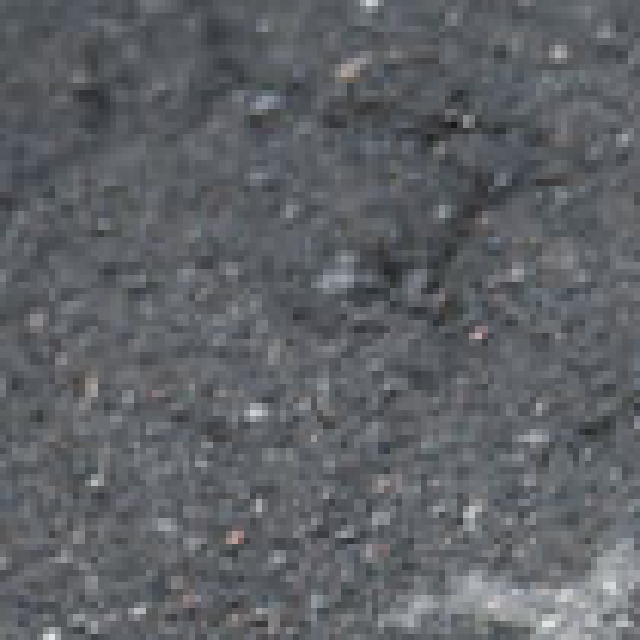

pothole1


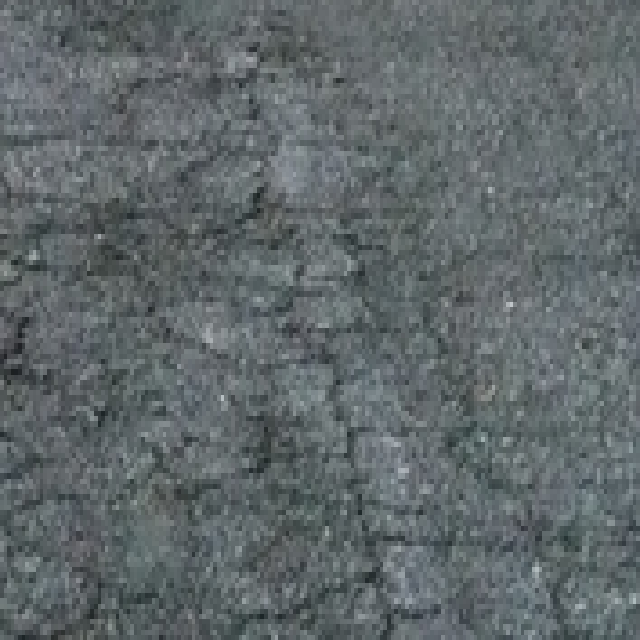

pothole1


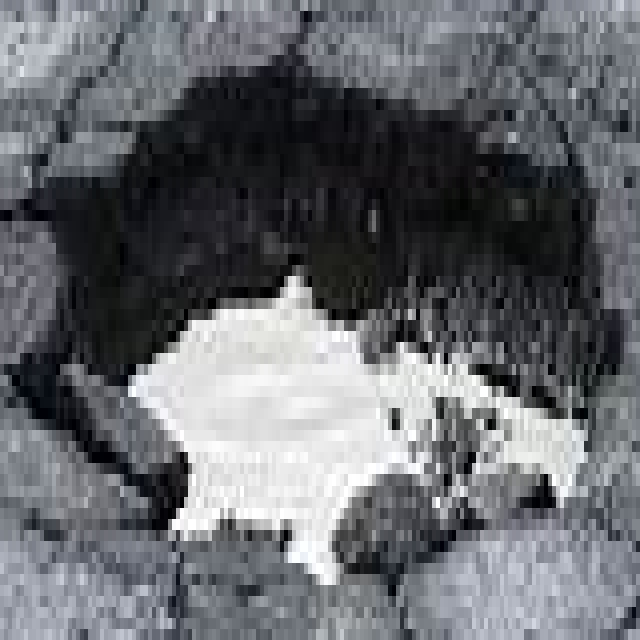

pothole3


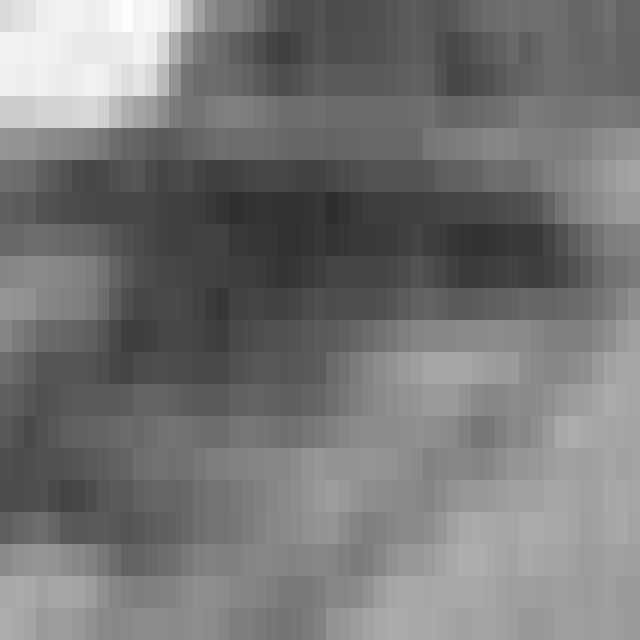

pothole3


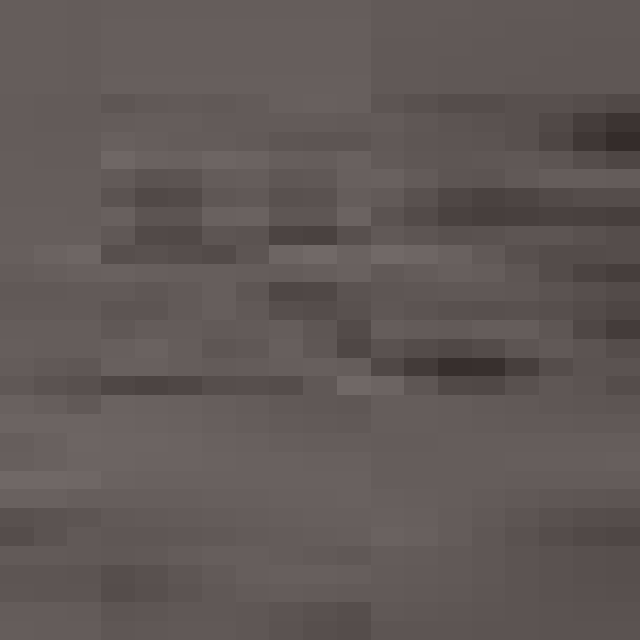

pothole1


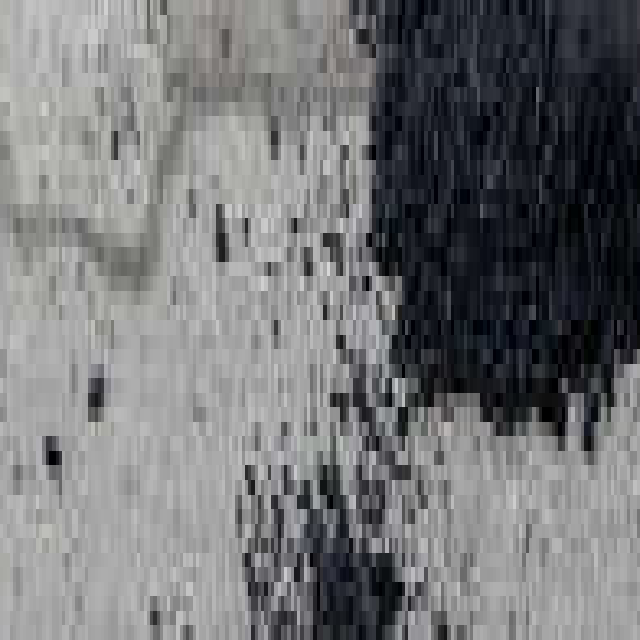

pothole1


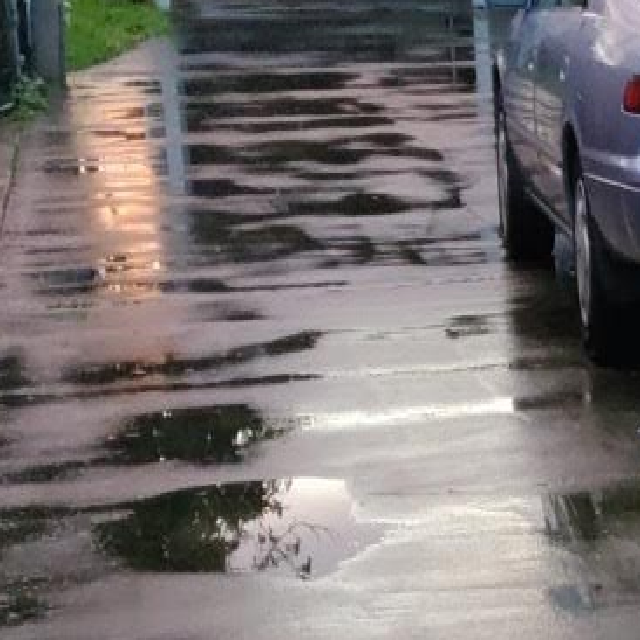

pothole0


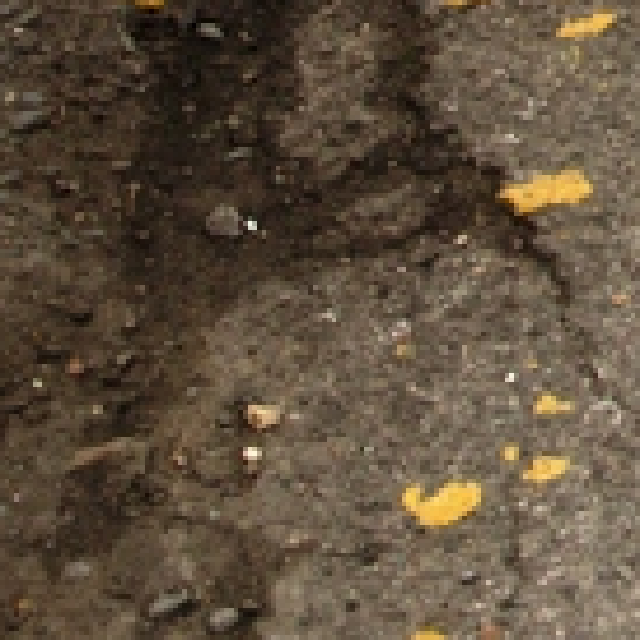

pothole1


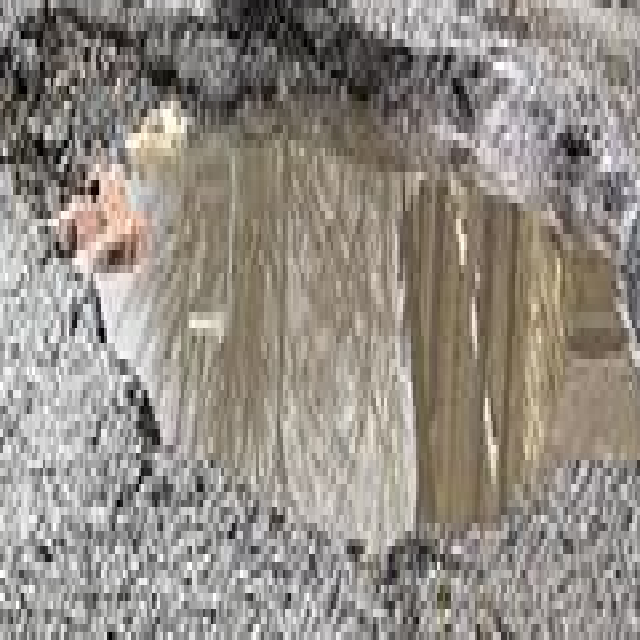

pothole3


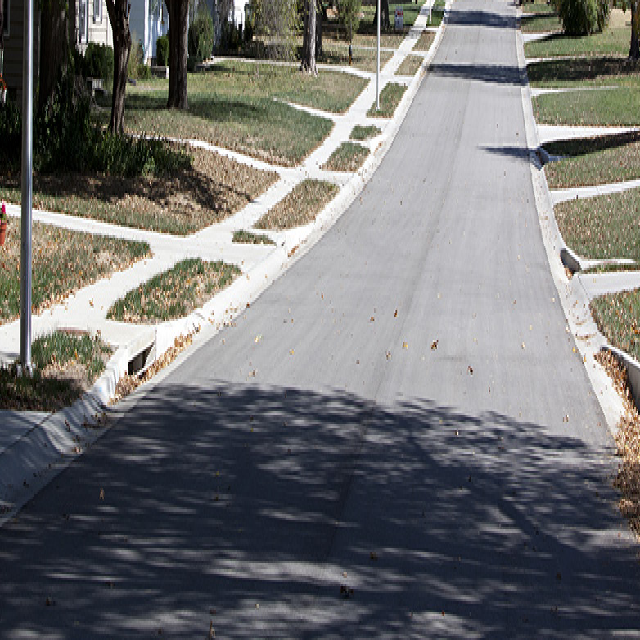

pothole0


In [8]:
import pathlib
import IPython.display as display
from PIL import Image
import os
import random


data_root = pathlib.Path('C:/Users/kles9/Desktop/CmpE257/CmpE257_team_project')
training_objs = list(data_root.glob('training_objects/*.png'))
training_objs = [str(path) for path in training_objs]
random.shuffle(training_objs)

for i in range(10):
    display.display(display.Image(training_objs[i]))
    print(os.path.basename(training_objs[i])[0:8])